In [1]:
import sys
sys.path.append('/project/FoolingDetection/pytorch')

from lib.VisualizationProvider import (plot_2d_distributions, 
                                       plot_scatter, 
                                       plot_gaussian_distributions,
                                       plot_heatmap,
                                       plot_comparison_heatmaps
                                      )

from lib.FeatureProvider import (load_all_grids, 
                                 load_all_grids_randparams,
                                 reduce_dimensionality_umap, 
                                 reduce_dimensionality_kpca, 
                                 reduce_dimensionality_tsne
                                )

from lib.StaticMetricProvider import (test_all_introspection_technique_combinations, 
                                      calc_distributions, 
                                      get_values_from_distance_matrix, 
                                      difference_distances, 
                                      apply_log_to_distances
                                     )
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

2023-10-29 19:26:29.221474: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-29 19:26:41.900496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-12.0/lib64
2023-10-29 19:26:41.900653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/pyt

# Base Code 

In [2]:
MODEL_TYPE = "mlp"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams/Cascading/4_Linear"
MAX_IMAGES = 300
RANDOM_STATE = 42
NUMBER_COMPONENTS = 2
BASE_DIR = "/project/FoolingDetection/pytorch/grids2"

In [3]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES,
    base_dir=BASE_DIR
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES,
    base_dir=BASE_DIR
)

distances_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)


difference_NoAttacked_RandLabels = difference_distances(
    reference=distances_1, 
    delta=distances_2, 
    fold_change_and_log_scale=True
)


Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading image 150 out of 300 (50.00%)
Loading image 200 out of 300 (66.67%)
Loading grids from disk...
Loading image 50 out of 300 (16.67%)
Loading image 100 out of 300 (33.33%)
Loading 

In [4]:
# UMap Reducer Object
umap_reducer = UMAP(n_components=NUMBER_COMPONENTS, random_state=RANDOM_STATE)


# UMap Transform
all_grids_1_umap = reduce_dimensionality_umap(all_grids_1, umap_reducer)
all_grids_2_umap = reduce_dimensionality_umap(all_grids_2, umap_reducer)


distances_umap_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1_umap, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances_umap_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2_umap, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

difference_umap_NoAttacked_RandLabels = difference_distances(
    reference=distances_umap_1, 
    delta=distances_umap_2, 
    fold_change_and_log_scale=True
)

Reducing dimensionality for technique shapeley_sampling...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique vgrads...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique g_t_i...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique dl...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique lime...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique ig...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique backprop...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique deep_lift_shap...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique shapeley_sampling...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique dl...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique g_t_i...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique ig...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique deep_lift_shap...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique vgrads...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique backprop...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique lime...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [5]:
# TSNE Reducer Object
tsne_reducer = TSNE(n_components=NUMBER_COMPONENTS, random_state=RANDOM_STATE)


# TSNE Transform
all_grids_1_tsne =reduce_dimensionality_tsne(all_grids_1, tsne_reducer)
all_grids_2_tsne =reduce_dimensionality_tsne(all_grids_2, tsne_reducer)

distances_tsne_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1_tsne, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances_tsne_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2_tsne, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

difference_tsne_NoAttacked_RandLabels = difference_distances(
    reference=distances_tsne_1, 
    delta=distances_tsne_2, 
    fold_change_and_log_scale=True
)

Reducing dimensionality for technique shapeley_sampling...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique lime...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique deep_lift_shap...
Reducing dimensionality for technique shapeley_sampling...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique lime...


In [6]:
# kPCA Transform
# kPCA-Linear Reducer Object
kpca_linear_reducer = KernelPCA(
        n_components=NUMBER_COMPONENTS, 
        kernel="linear", 
        gamma=.1, 
        eigen_solver="auto", 
        random_state=RANDOM_STATE, 
        alpha=10)

# Linear kernel
all_grids_1_kpca_linear = reduce_dimensionality_kpca(all_grids_1, kpca_linear_reducer)
all_grids_2_kpca_linear = reduce_dimensionality_kpca(all_grids_2, kpca_linear_reducer)

distances_kcpa_linear_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1_kpca_linear, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances_kcpa_linear_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2_kpca_linear, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

difference_kpca_linear_NoAttacked_RandLabels = difference_distances(
    reference=distances_kcpa_linear_1, 
    delta=distances_kcpa_linear_2, 
    fold_change_and_log_scale=True
)

# Poly kernel

# kPCA-Poly Reducer Object
kpca_poly_reducer = KernelPCA(
        n_components=NUMBER_COMPONENTS, 
        kernel="poly", 
        gamma=.1, 
        eigen_solver="auto", 
        random_state=RANDOM_STATE, 
        alpha=10)

all_grids_1_kpca_poly = reduce_dimensionality_kpca(all_grids_1, kpca_poly_reducer)
all_grids_2_kpca_poly = reduce_dimensionality_kpca(all_grids_2, kpca_poly_reducer)

distances_kcpa_poly_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1_kpca_poly, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances_kcpa_poly_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2_kpca_poly, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

difference_kpca_poly_NoAttacked_RandLabels = difference_distances(
    reference=distances_kcpa_poly_1, 
    delta=distances_kcpa_poly_2, 
    fold_change_and_log_scale=True
)

# Cosine kernel
# kPCA-Cosine Reducer Object
kpca_cosine_reducer = KernelPCA(
        n_components=NUMBER_COMPONENTS, 
        kernel="cosine", 
        gamma=.1, 
        eigen_solver="auto", 
        random_state=RANDOM_STATE, 
        alpha=10)

all_grids_1_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, kpca_cosine_reducer)
all_grids_2_kpca_cosine = reduce_dimensionality_kpca(all_grids_2, kpca_cosine_reducer)

distances_kcpa_cosine_1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1_kpca_cosine, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances_kcpa_cosine_2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2_kpca_cosine, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

difference_kpca_cosine_NoAttacked_RandLabels = difference_distances(
    reference=distances_kcpa_cosine_1, 
    delta=distances_kcpa_cosine_2, 
    fold_change_and_log_scale=True
)


Reducing dimensionality for technique shapeley_sampling...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique lime...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique deep_lift_shap...
Reducing dimensionality for technique shapeley_sampling...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique deep_lift_shap...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique lime...
Reducing dimensionality for technique shapeley_sampling...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimen

# Lower-Dimensional Comparison (Aggregated)
Map the unattacked and an attacked version to a lower_dim space (n=2) and see how the distributions in this lower-dim space differ!

## Normal vs. RandLabels

### UMap

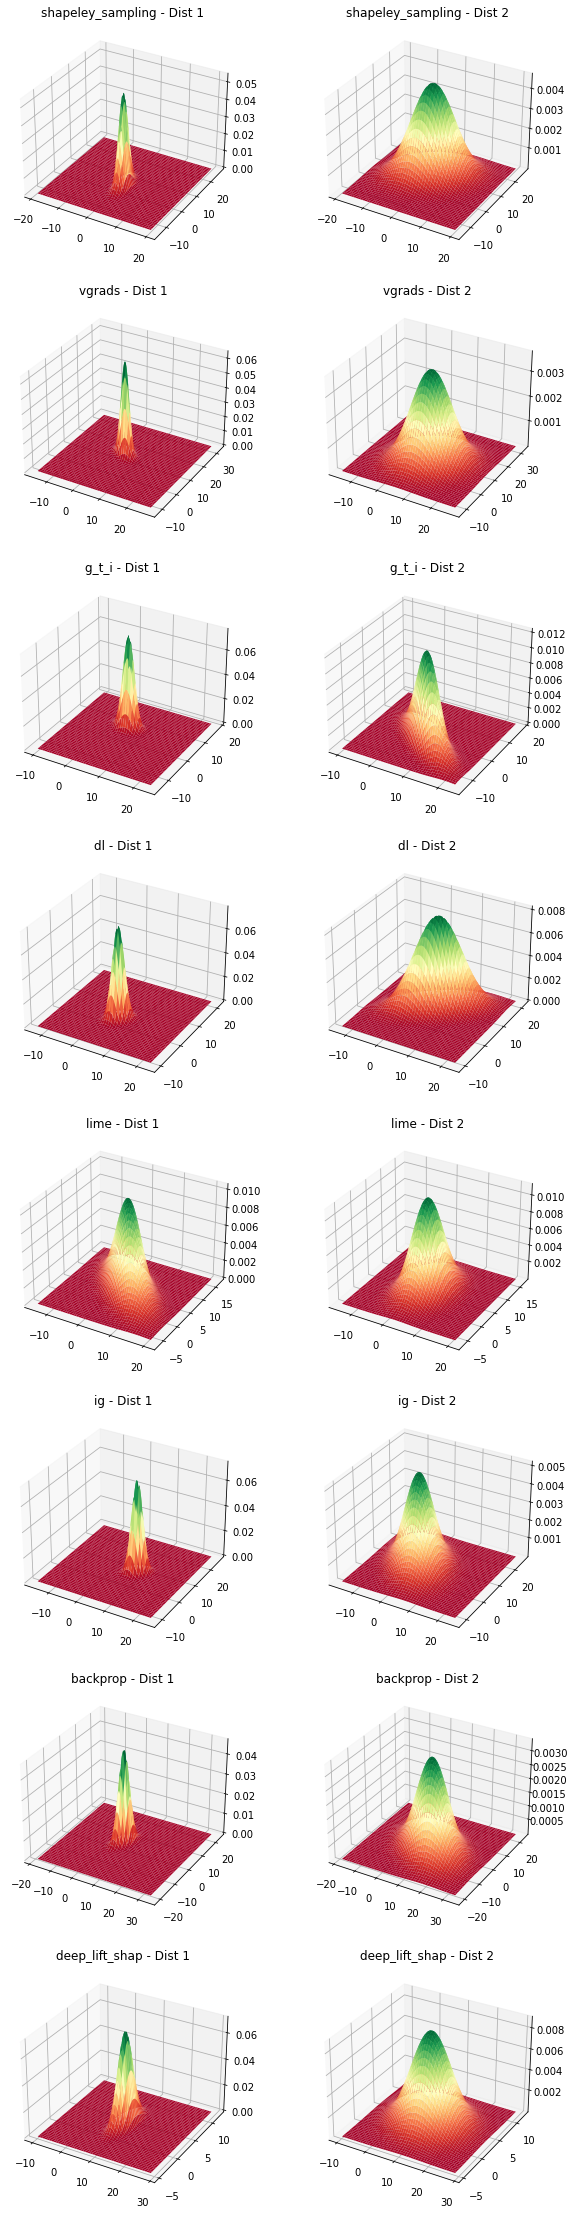

In [7]:
plot_2d_distributions(all_grids_1_umap, all_grids_2_umap)

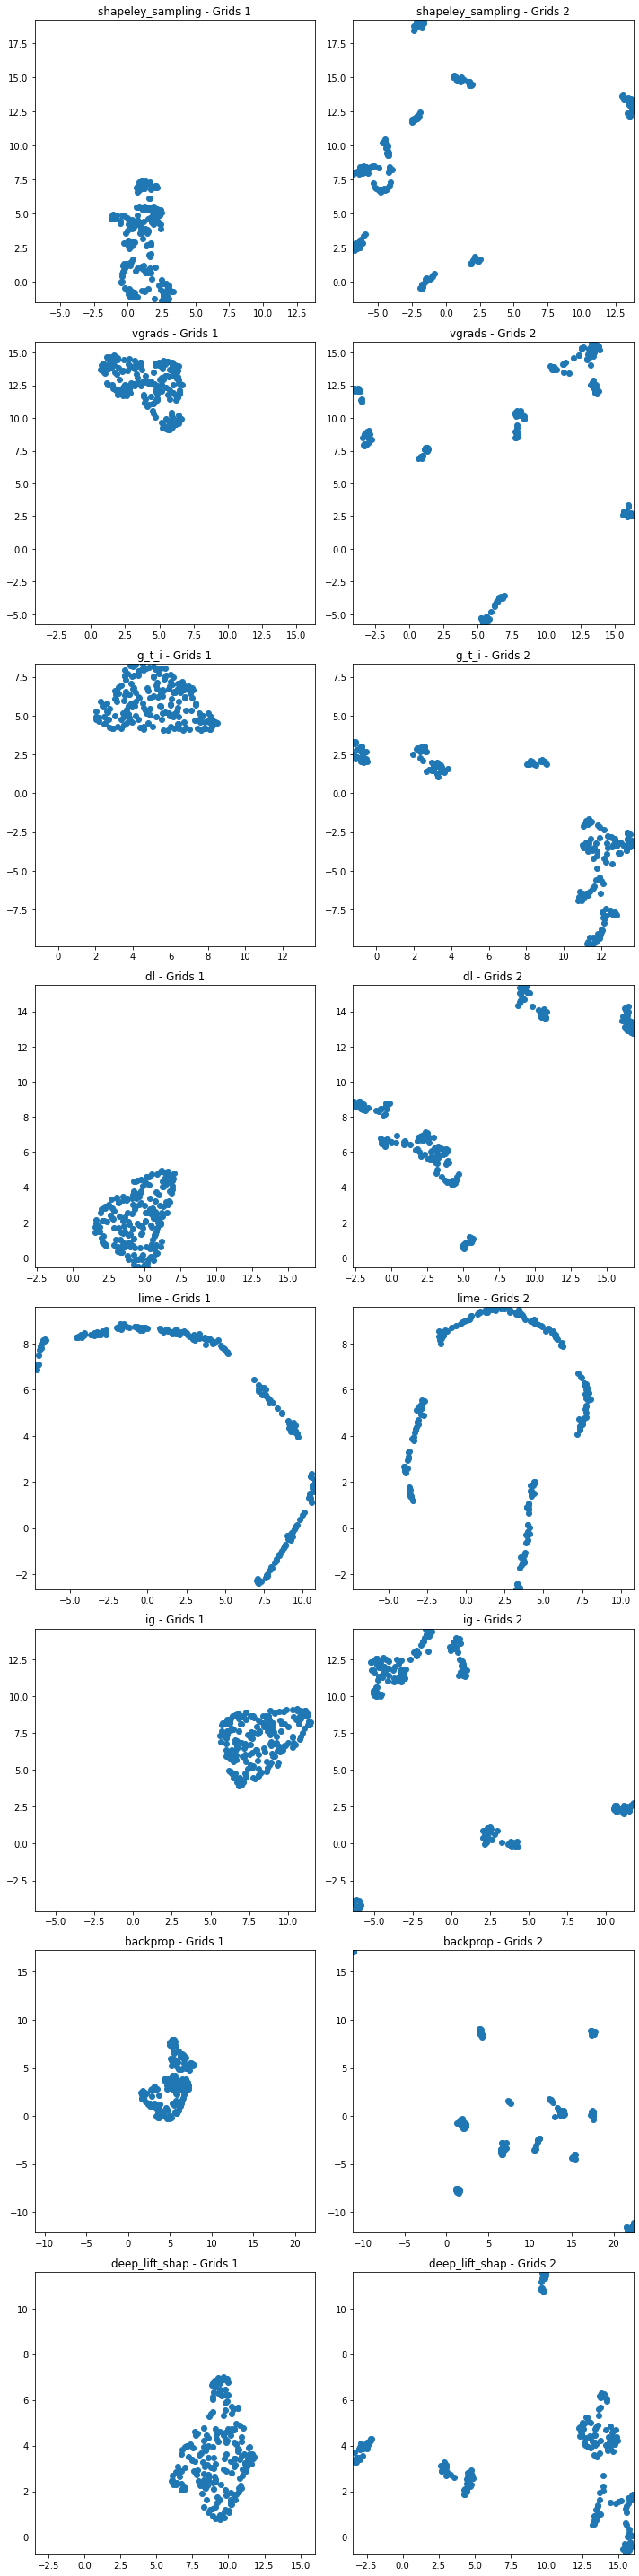

In [8]:
plot_scatter(all_grids_1_umap, all_grids_2_umap)

### kPCA (Linear)

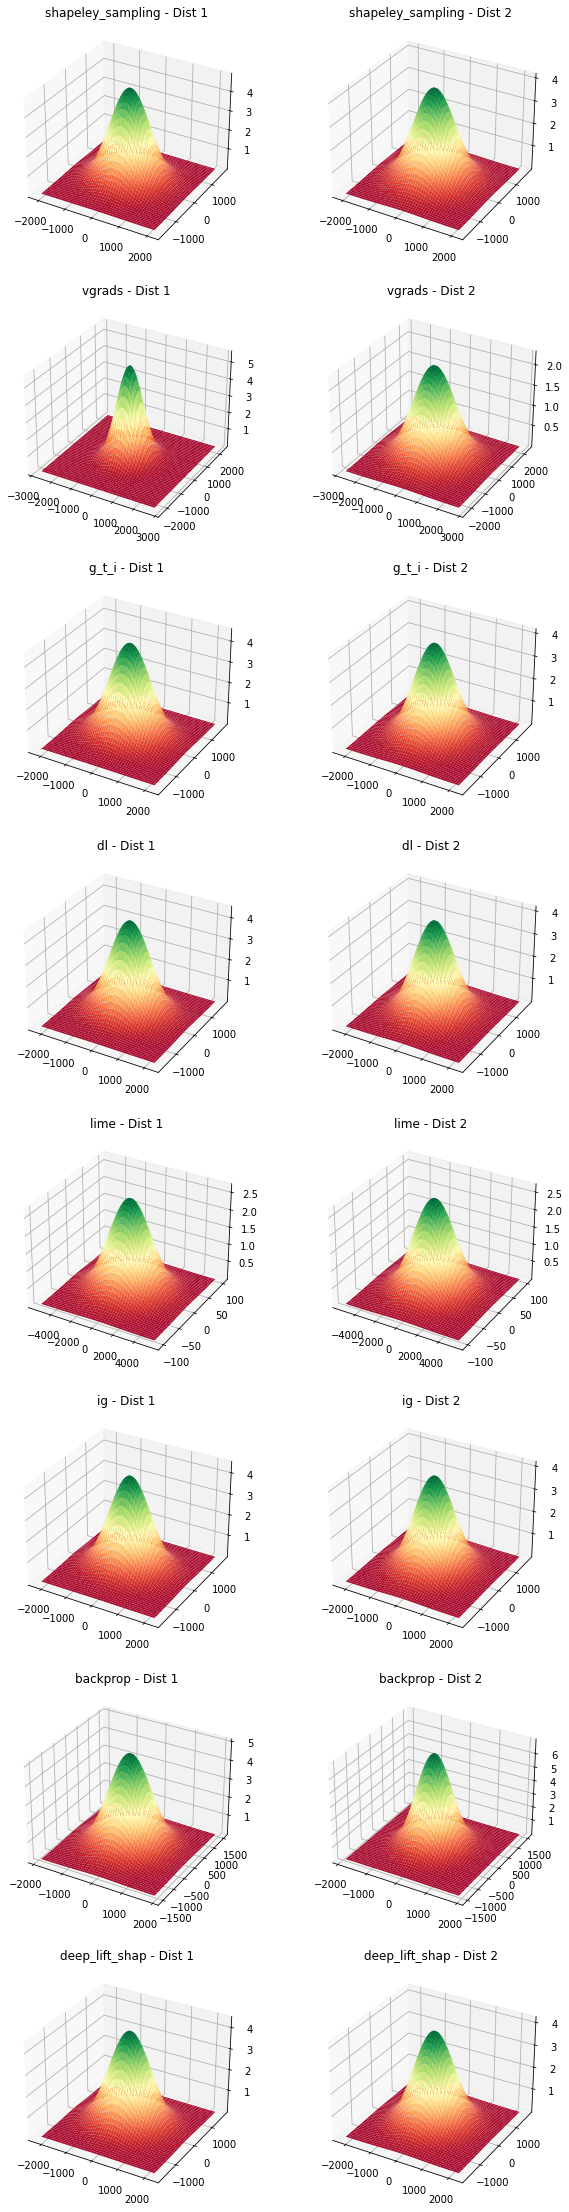

In [9]:
plot_2d_distributions(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

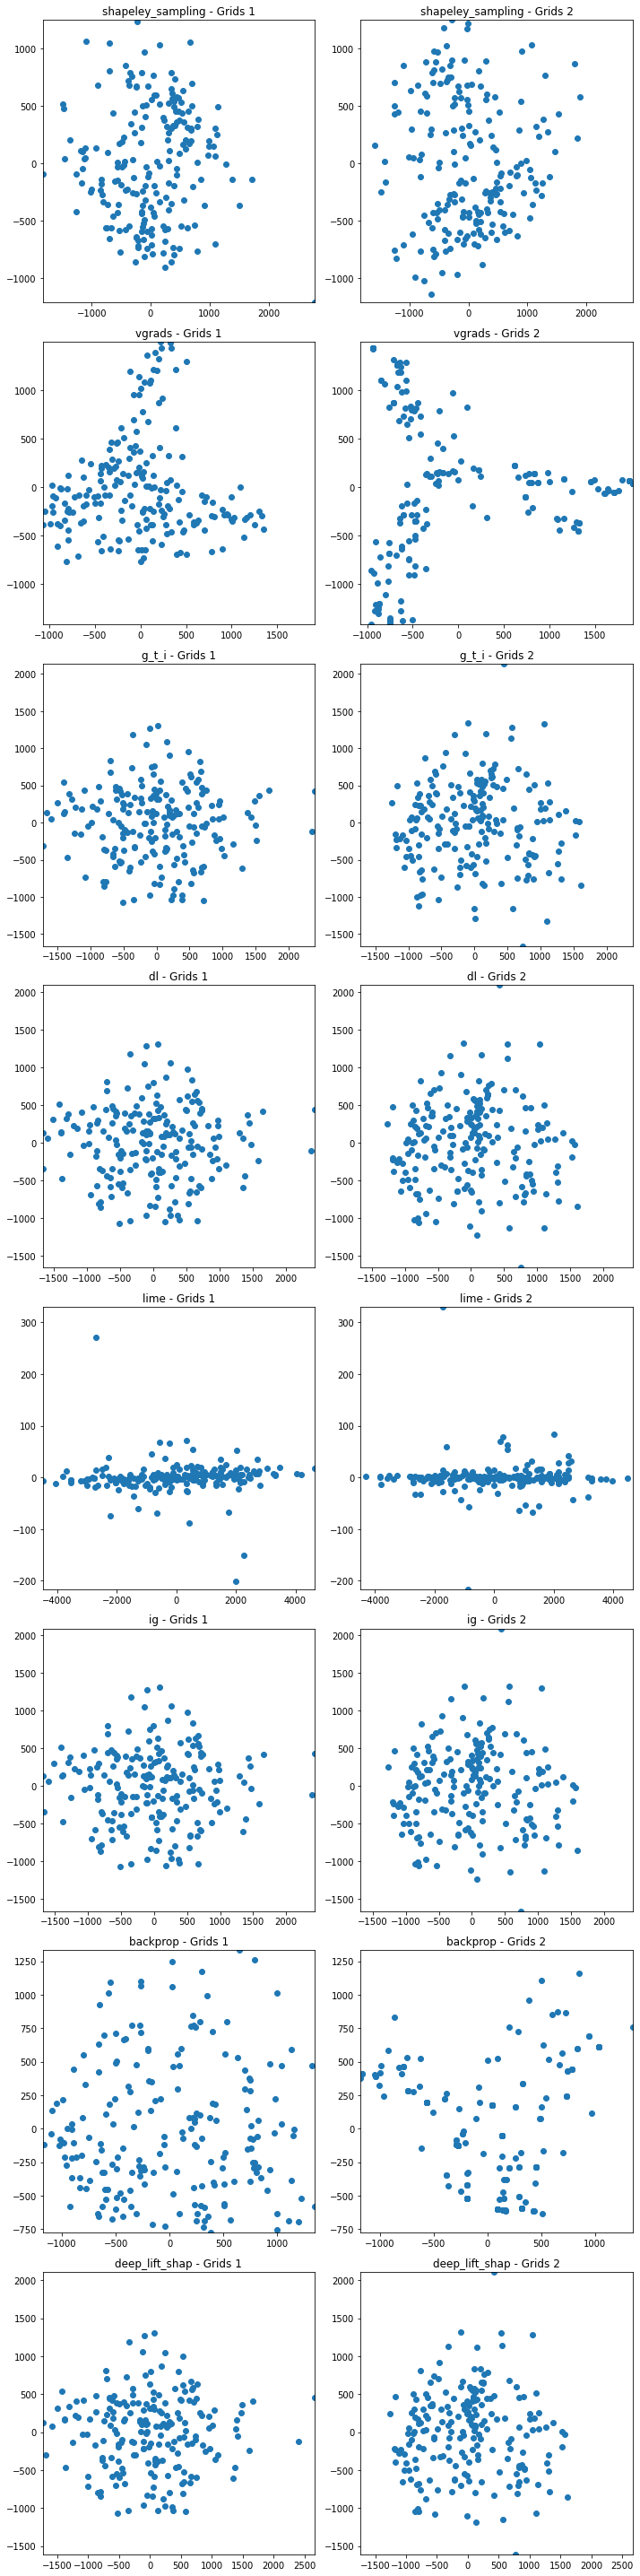

In [10]:
plot_scatter(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

### kPCA (poly)

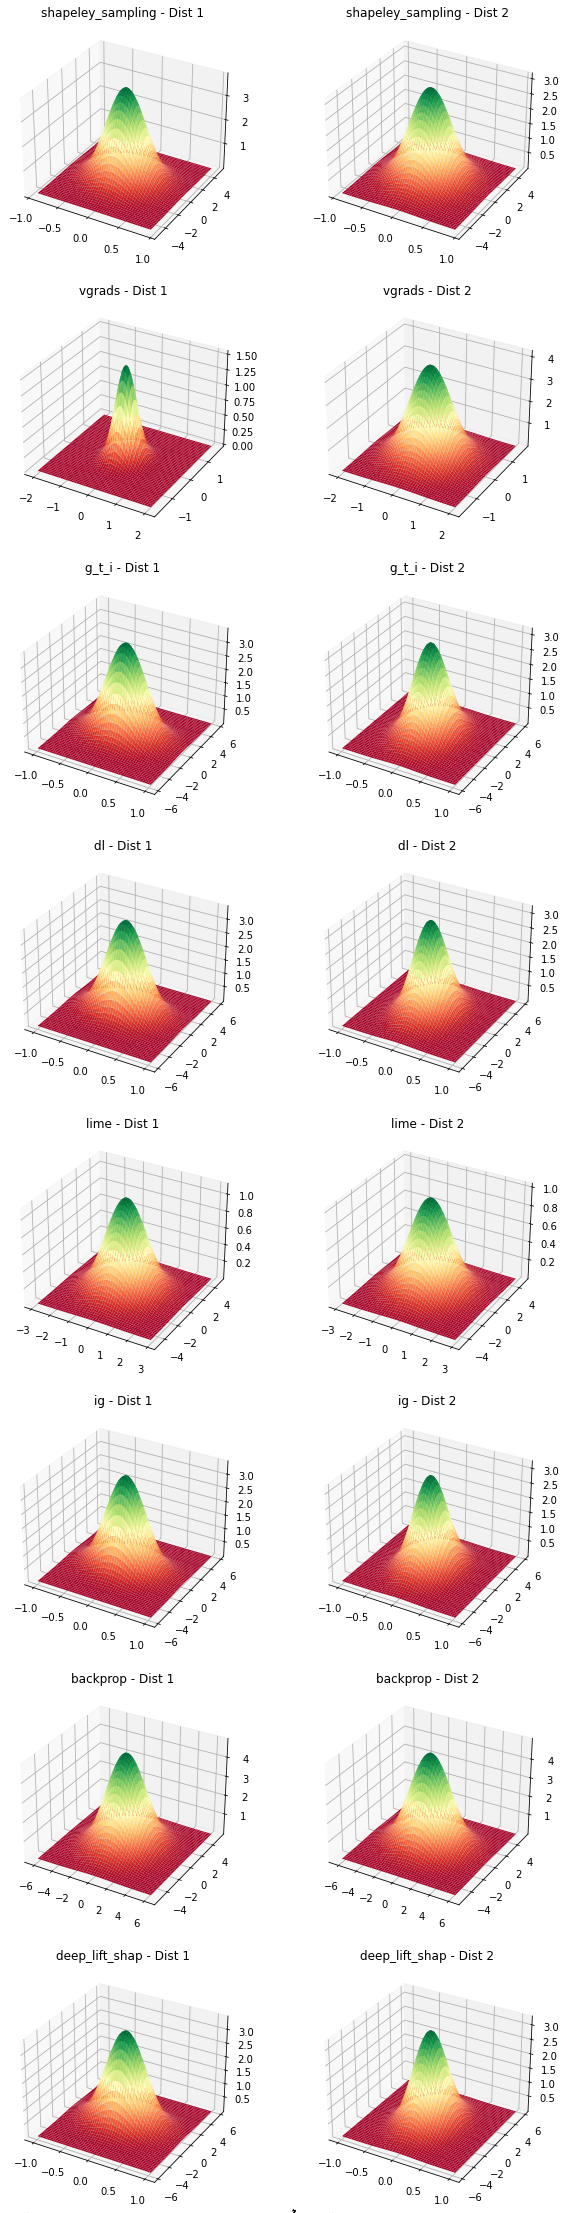

In [11]:
plot_2d_distributions(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

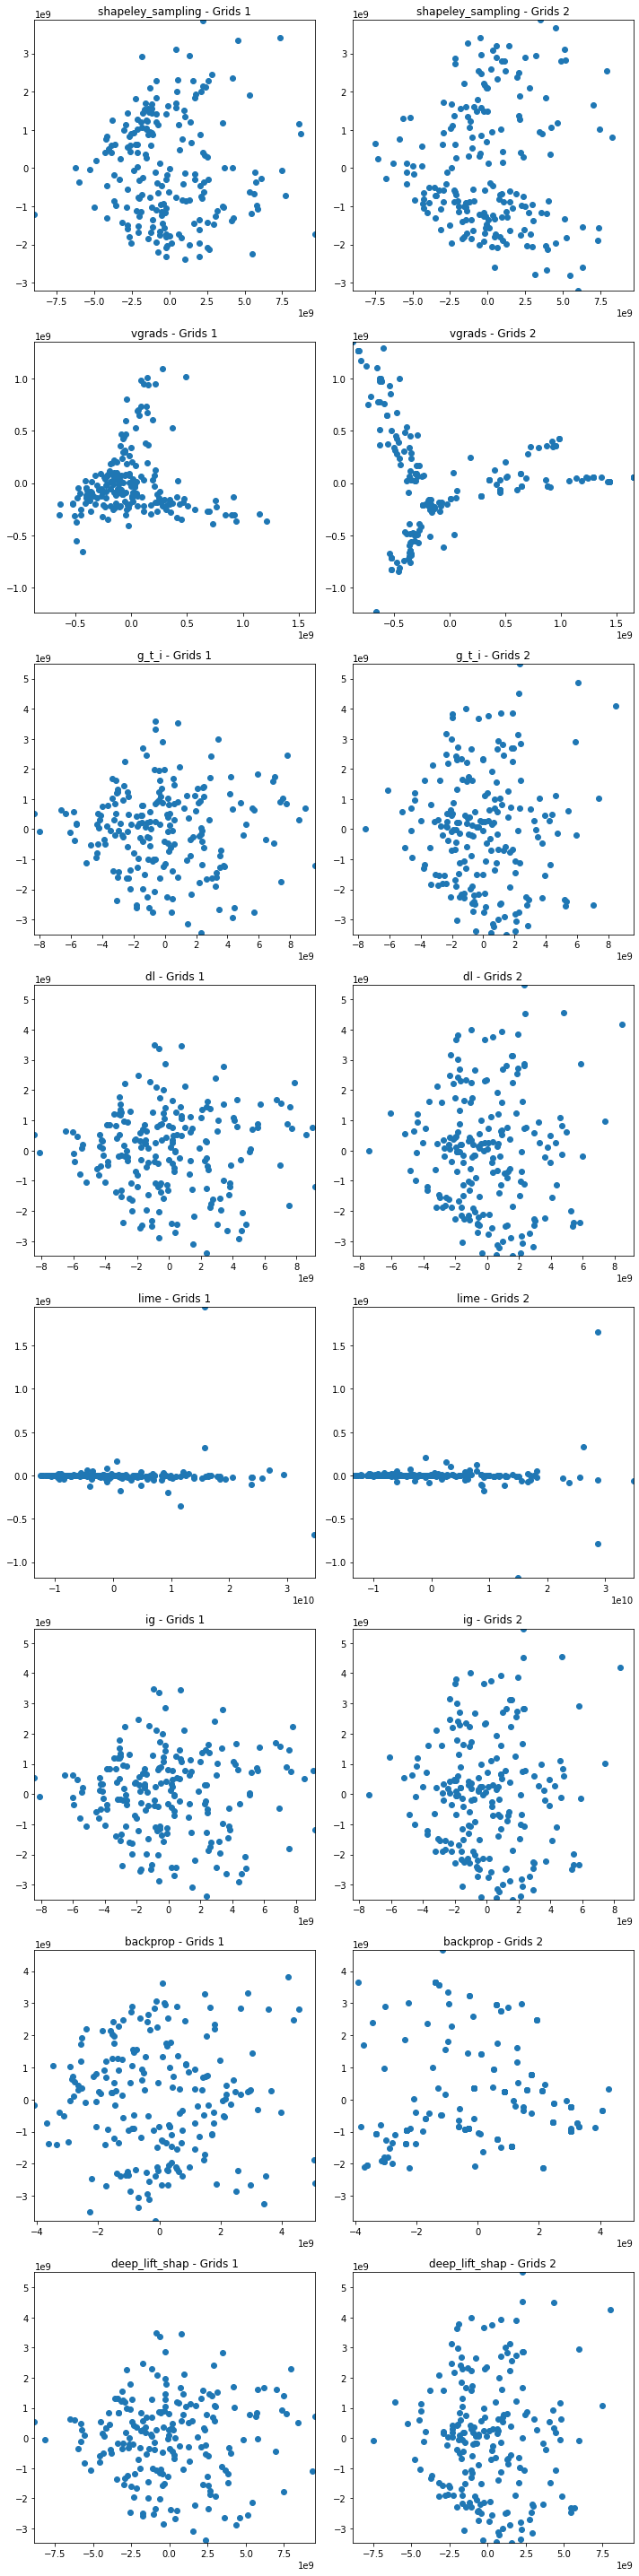

In [12]:
plot_scatter(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

### kPCA (cosine)

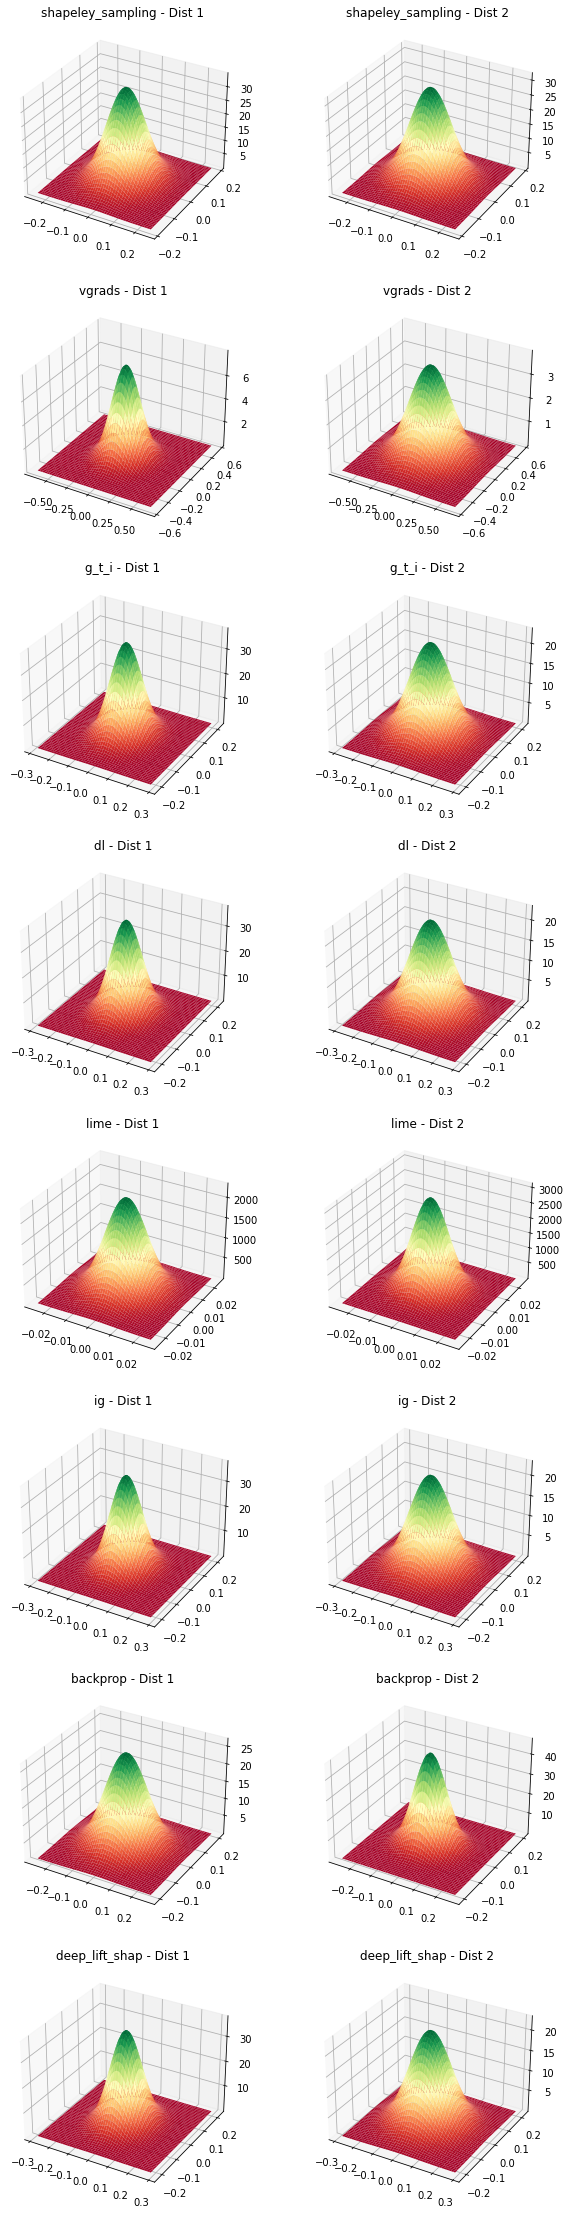

In [13]:
plot_2d_distributions(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

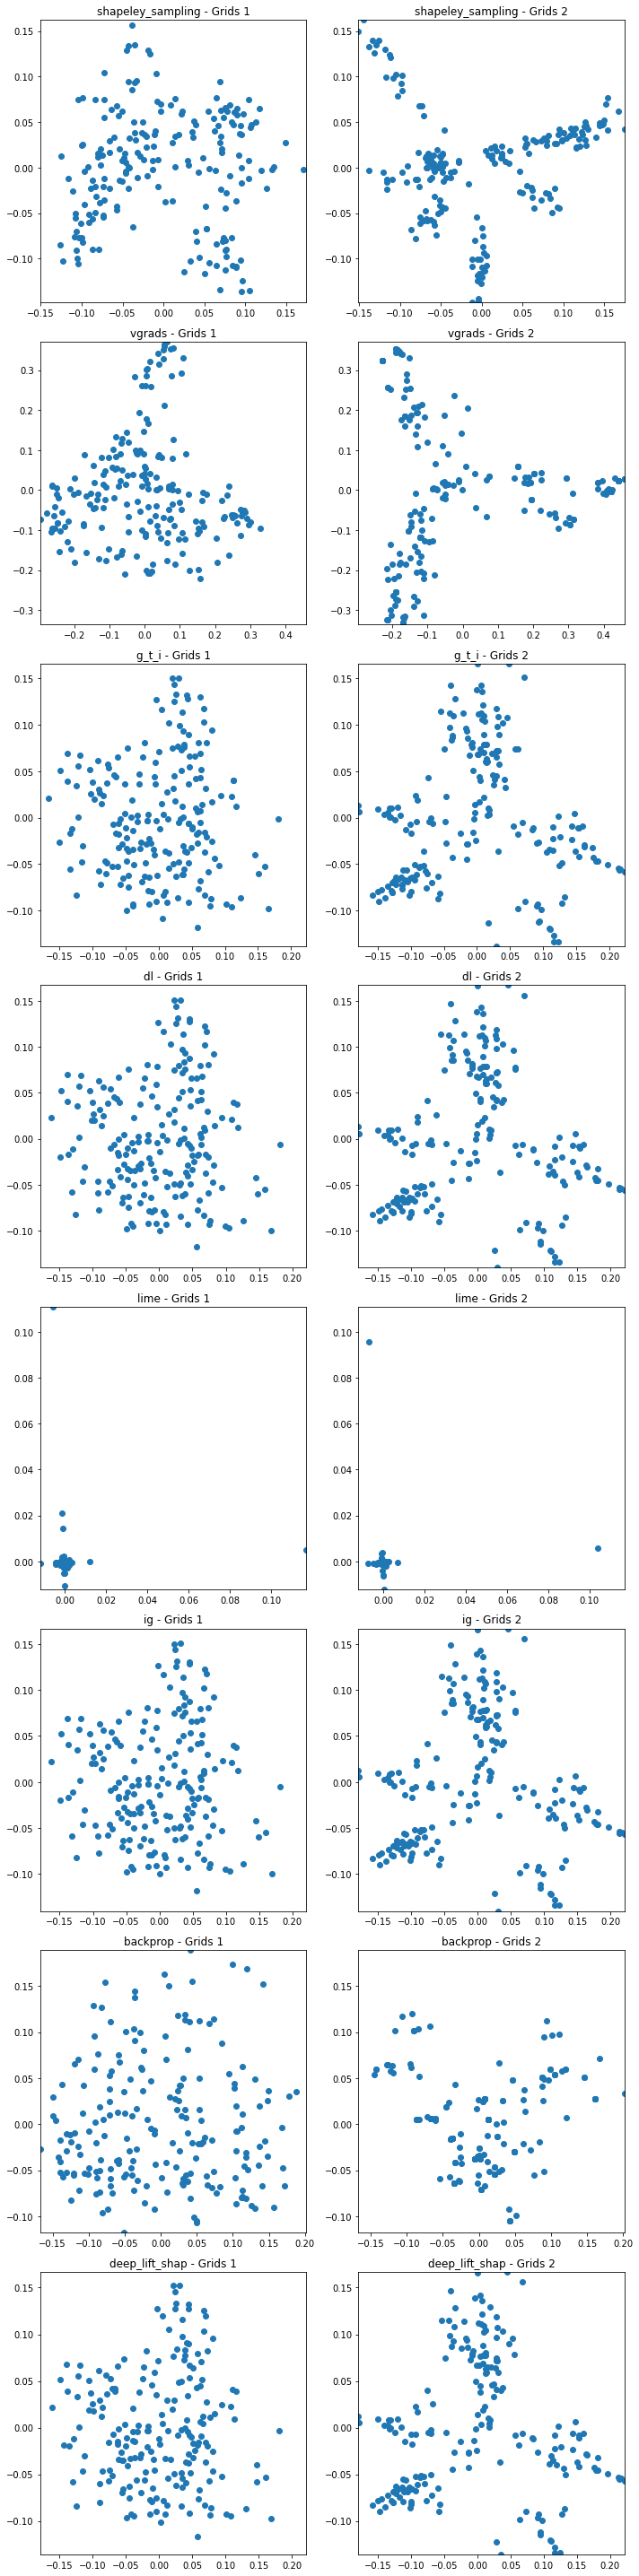

In [14]:
plot_scatter(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

### t-SNE

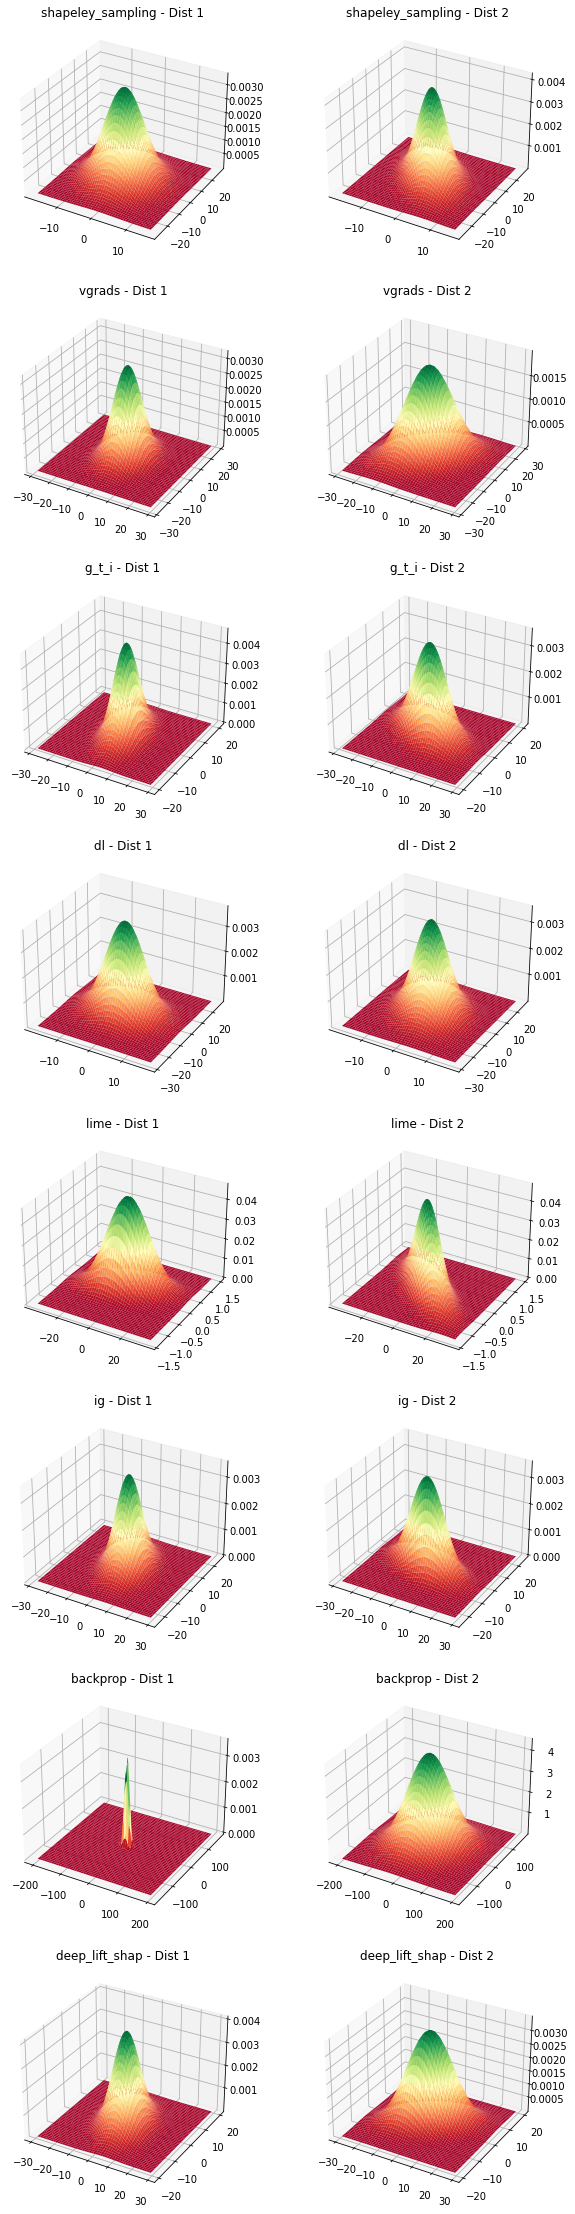

In [15]:
# (this execution works but takes ages...)
plot_2d_distributions(all_grids_1_tsne, all_grids_2_tsne)

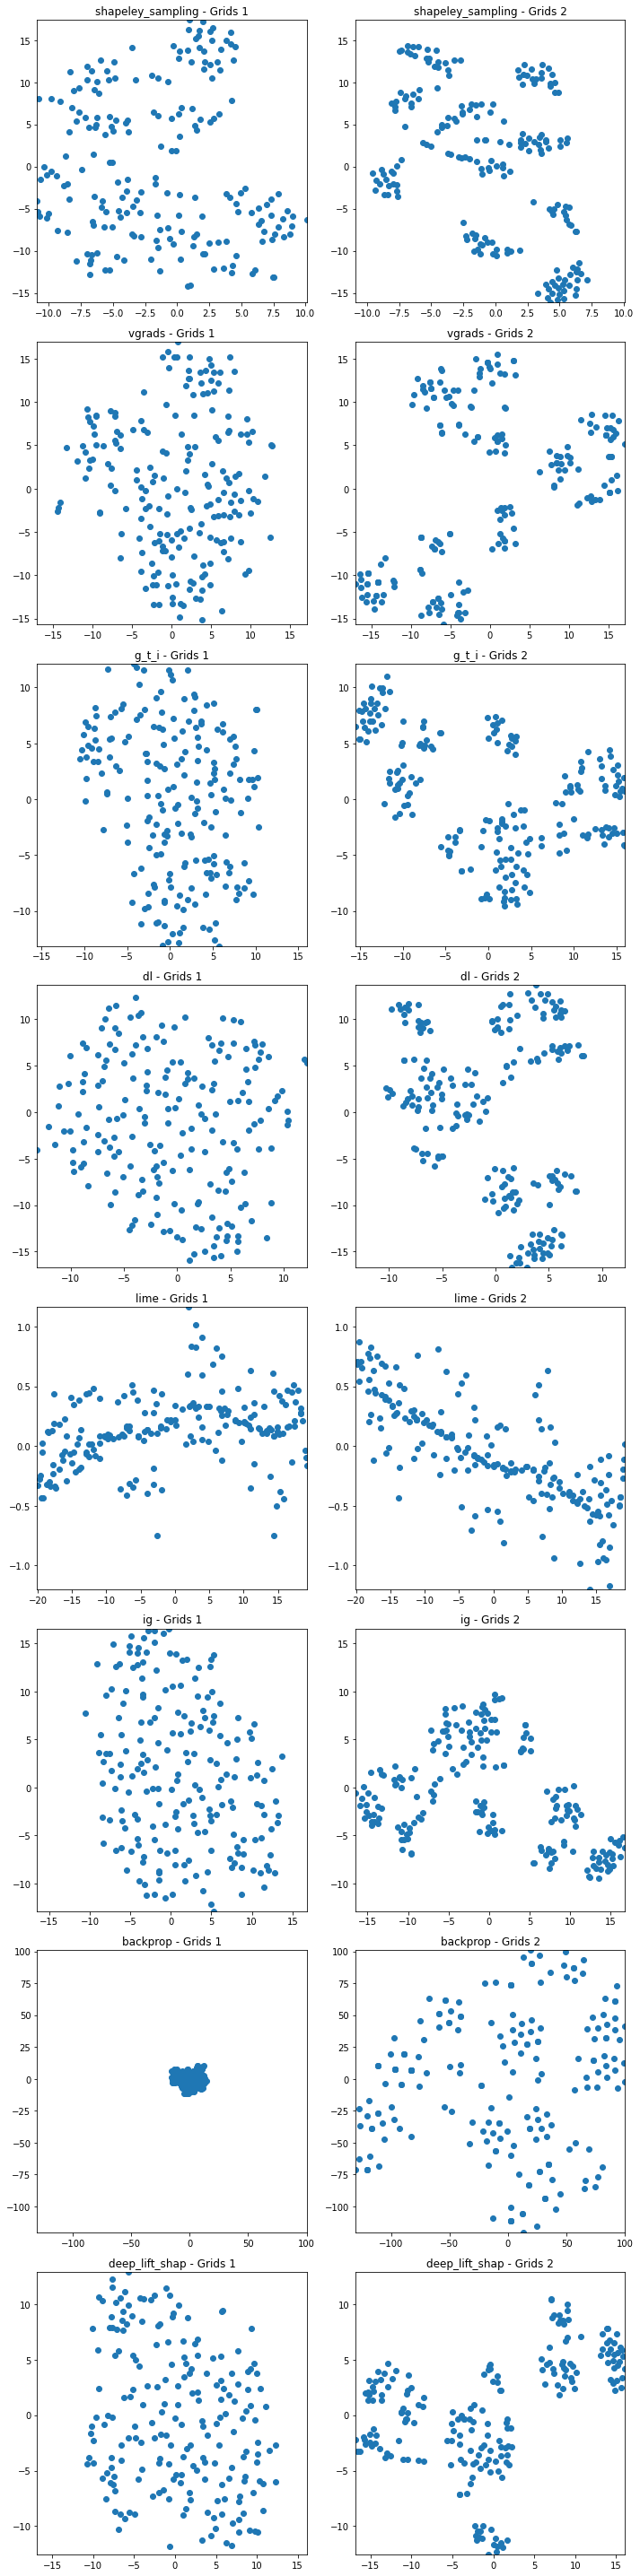

In [16]:
plot_scatter(all_grids_1_tsne, all_grids_2_tsne)

# Per-Image Comparison 
For a combination of two Explanation Techniques (expl1, expl2) (e.g. expl1=DeepLift, expl2=vanillaGrads) compute the distance for each image in a **Lower and High Dimensional Space**. Finally, plot the distributions. 

This is also done for the difference of the distances. For this the distances for an attacked and non-attacked versions are calculated and then the difference is calculated using the fold_change on a logarithmic scale. Finally, this is plotted aswell.

In [17]:
METRIC="euclidean"

## High-Dimensional 

### No Attack

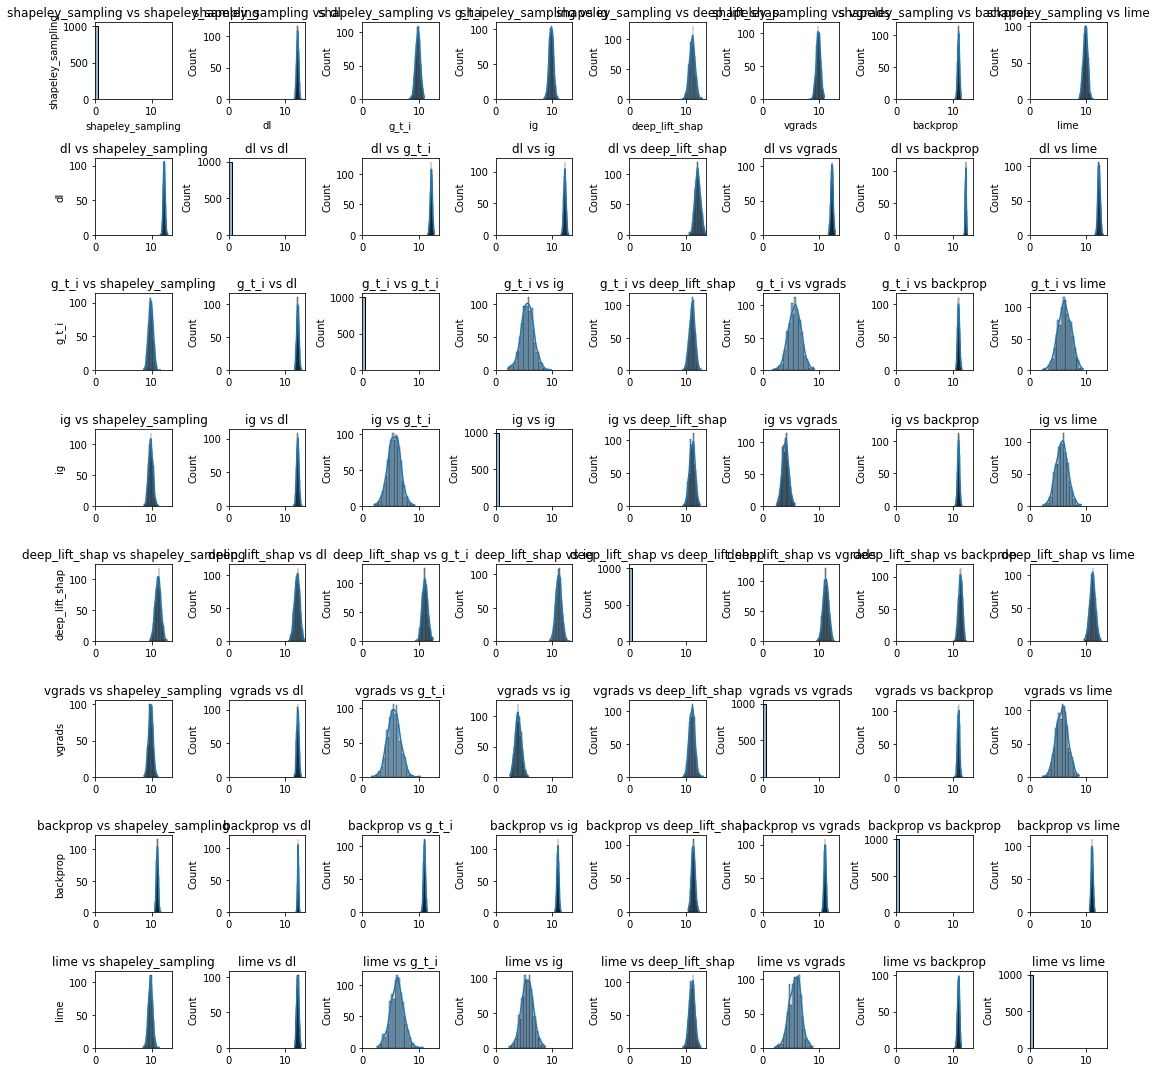

In [18]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_1), 
    techniques=list(techniques), 
    metric=METRIC
)

### RandLabels Attack

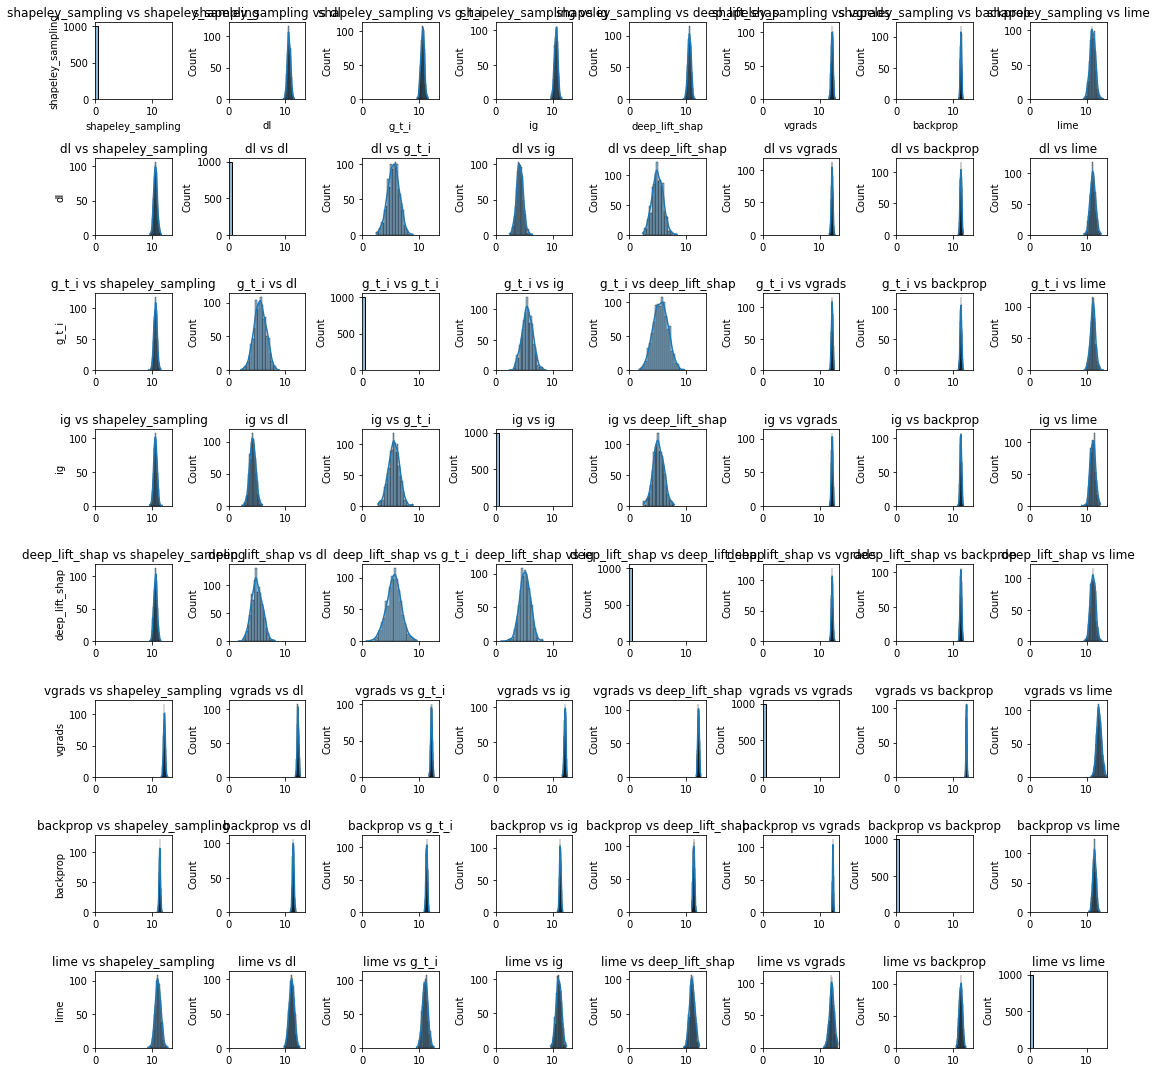

In [19]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_2), 
    techniques=list(techniques), 
    metric=METRIC
)

### No Attack vs. RandLabels (Difference)

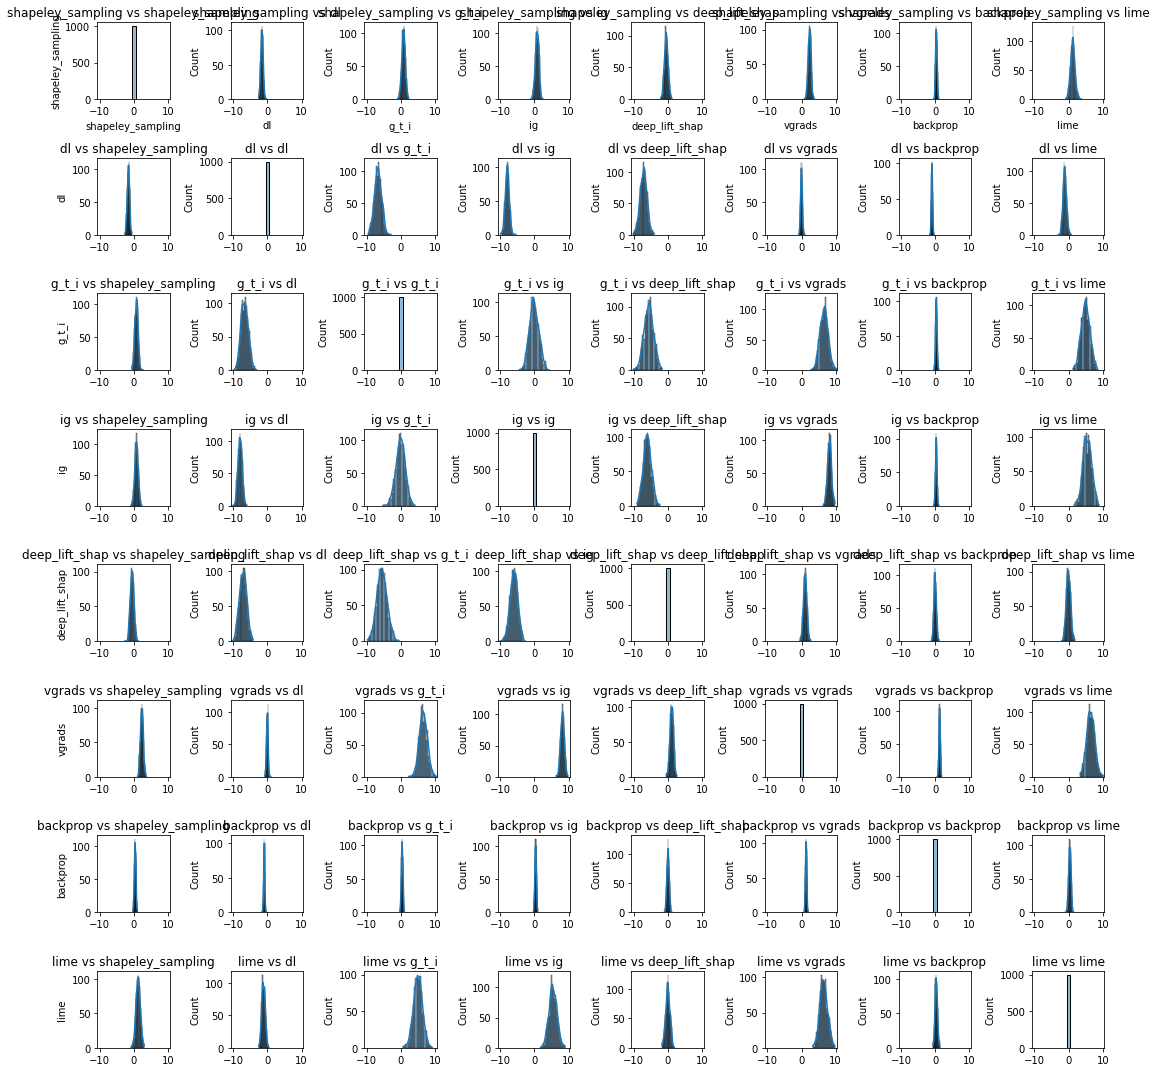

In [20]:
plot_gaussian_distributions(
    distances=difference_NoAttacked_RandLabels, 
    techniques=list(techniques), 
    metric=METRIC
)

## UMap

### No Attack

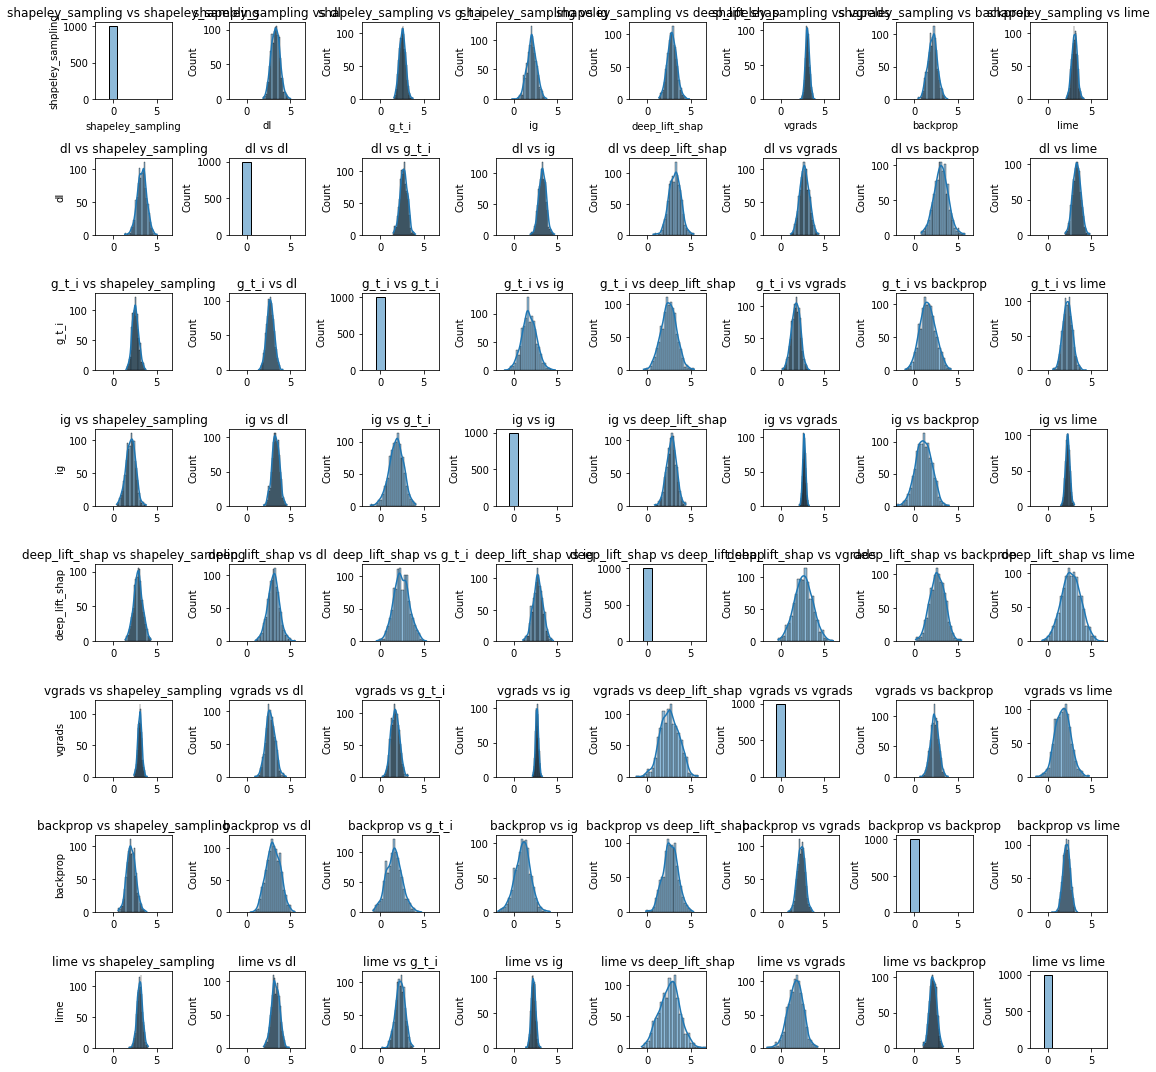

In [21]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_umap_1), 
    techniques=list(techniques), 
    metric=METRIC
)

### RandLabels Attack

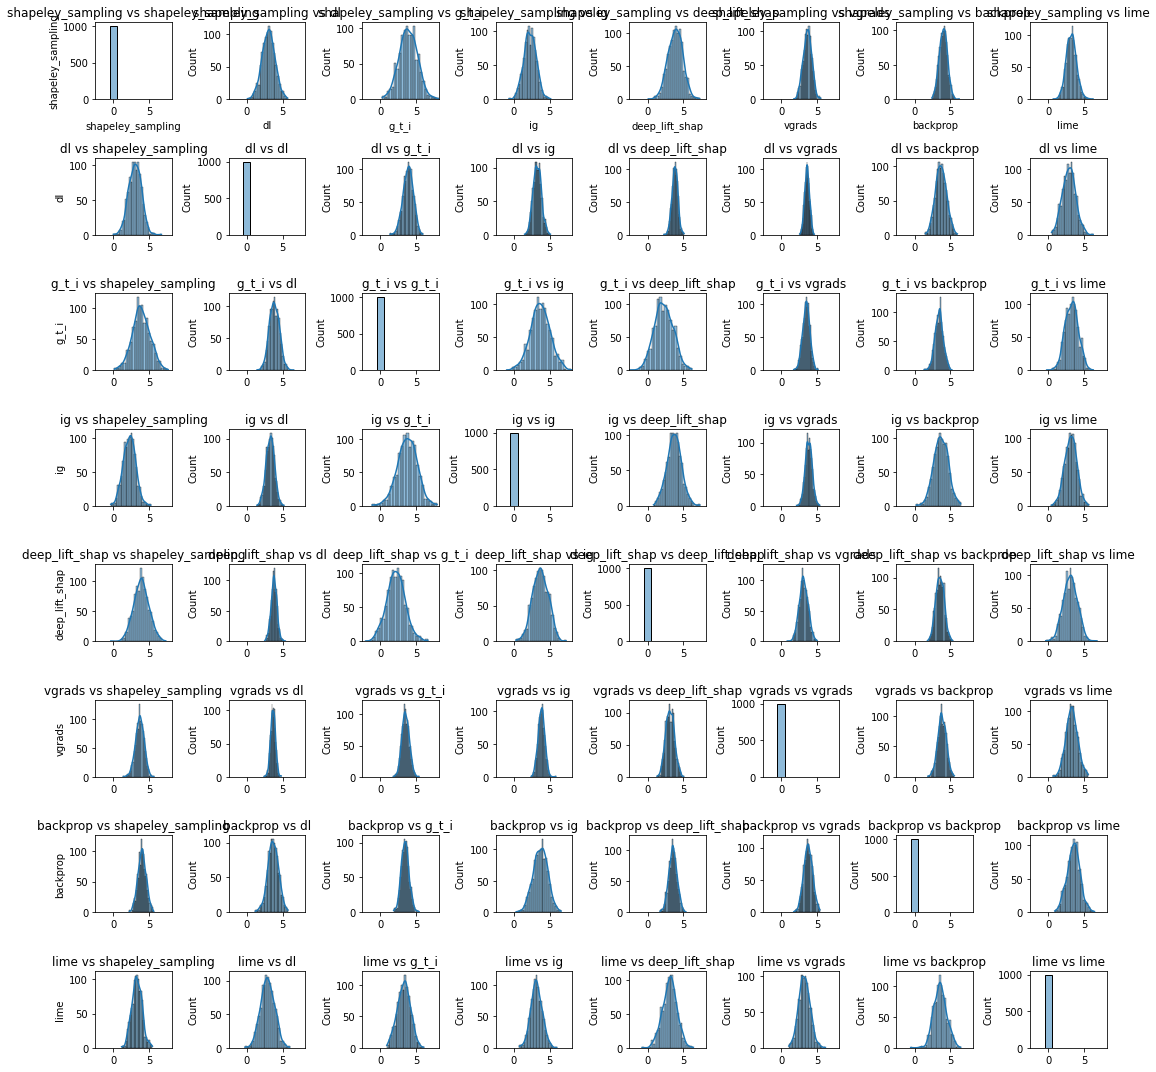

In [22]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_umap_2), 
    techniques=list(techniques), 
    metric=METRIC
)

### No Attack vs. RandLabels (Difference)

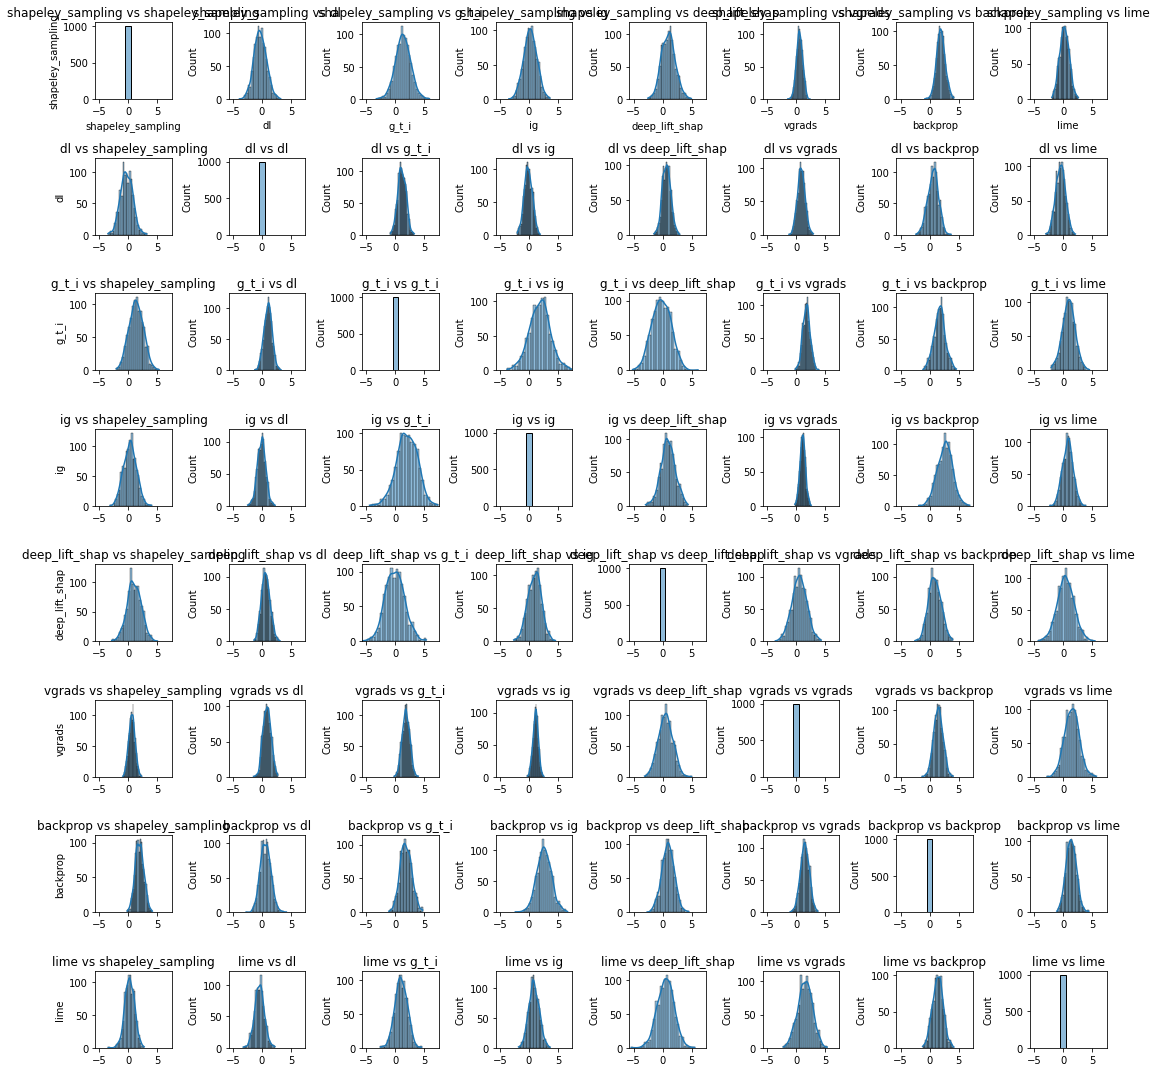

In [23]:
plot_gaussian_distributions(
    distances=difference_umap_NoAttacked_RandLabels, 
    techniques=list(techniques), 
    metric=METRIC
)

## kPCA (Linear)

### No Attack

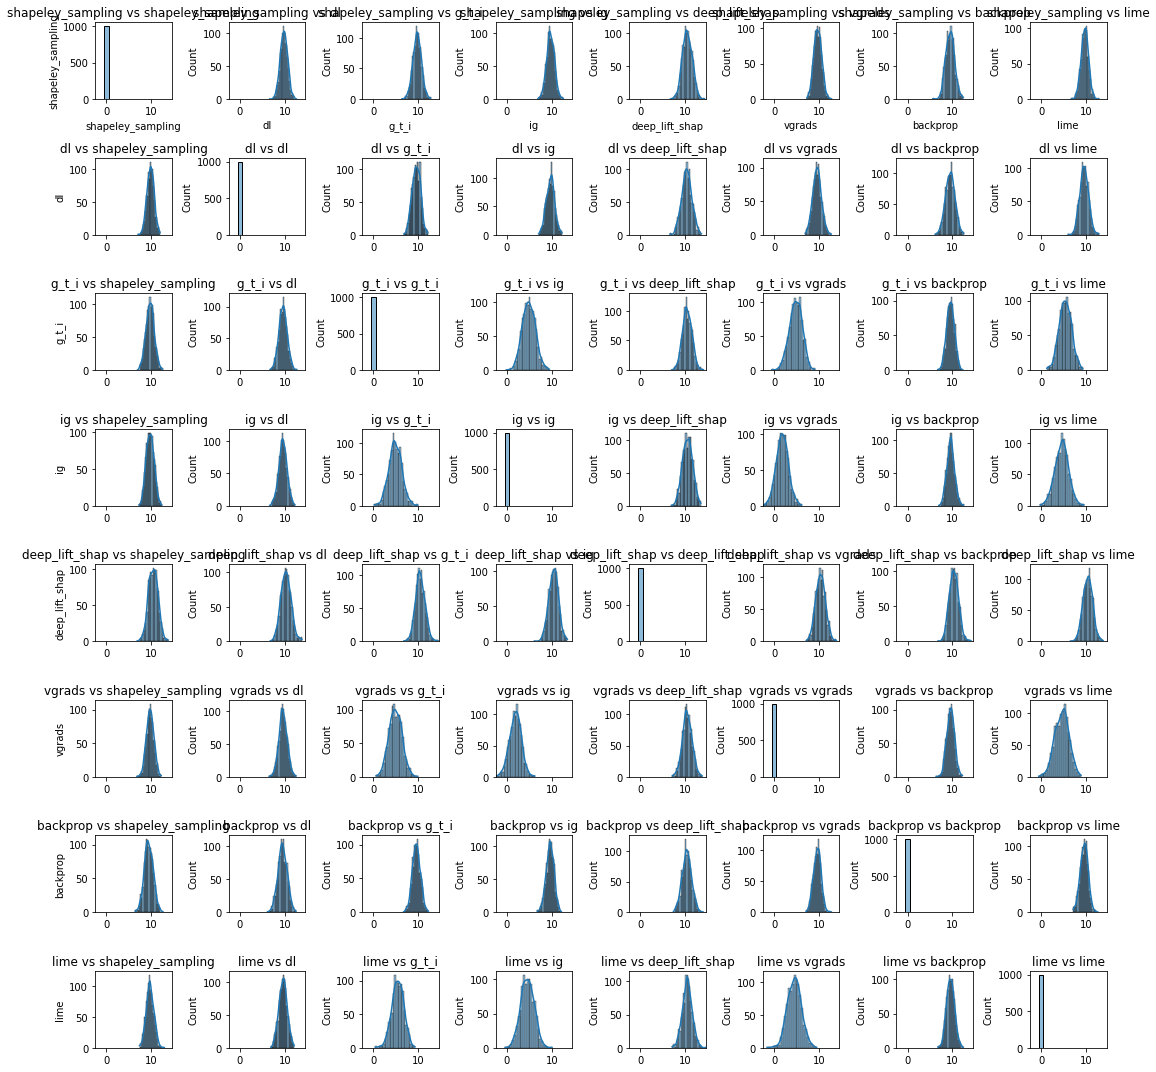

In [24]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_kcpa_linear_1), 
    techniques=list(techniques), 
    metric=METRIC
)

### RandLabels Attack

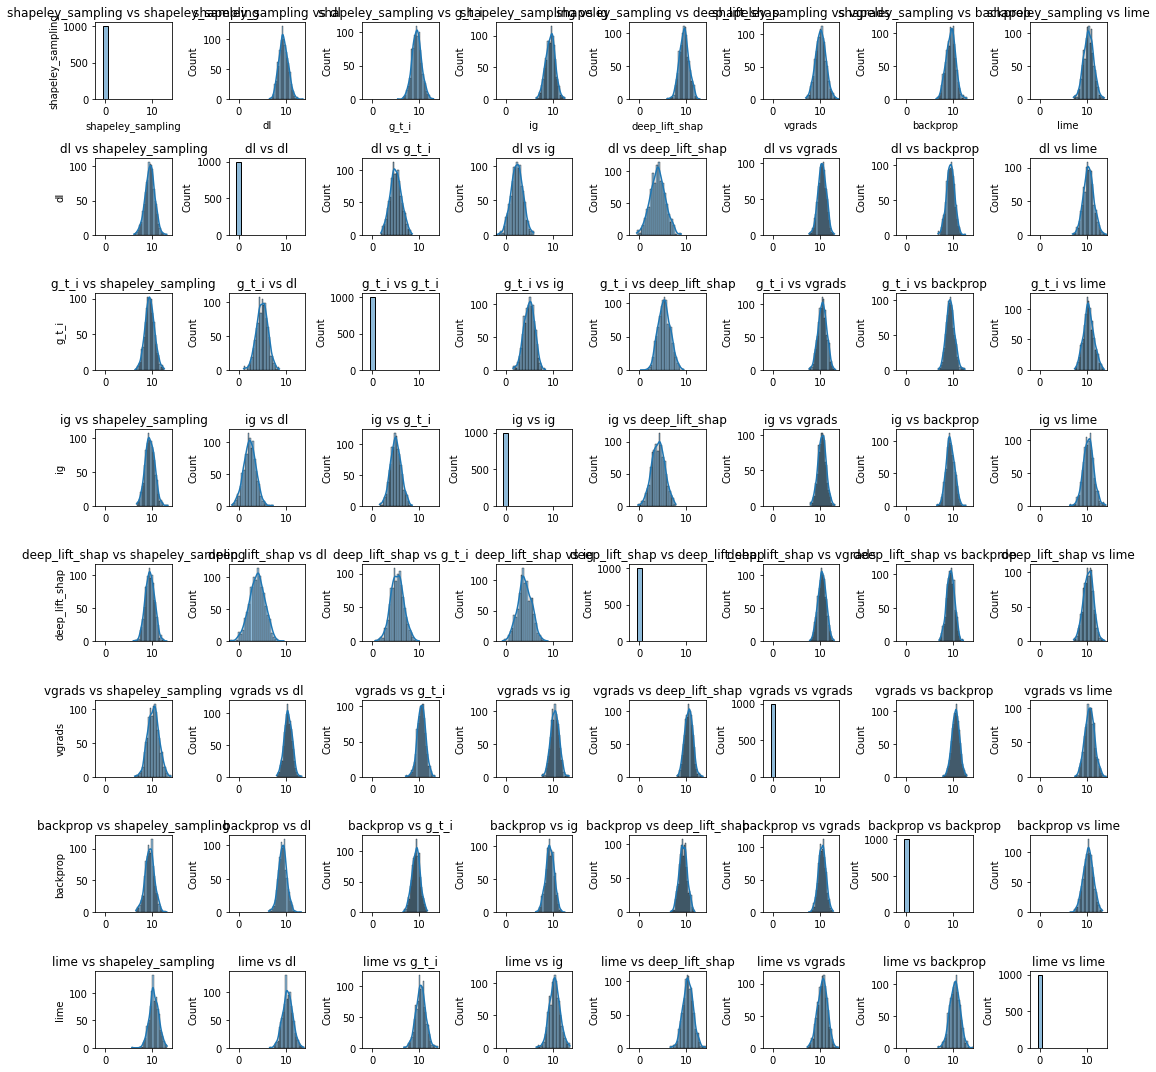

In [25]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_kcpa_linear_2), 
    techniques=list(techniques), 
    metric=METRIC
)

### No Attack vs. RandLabels (Difference)

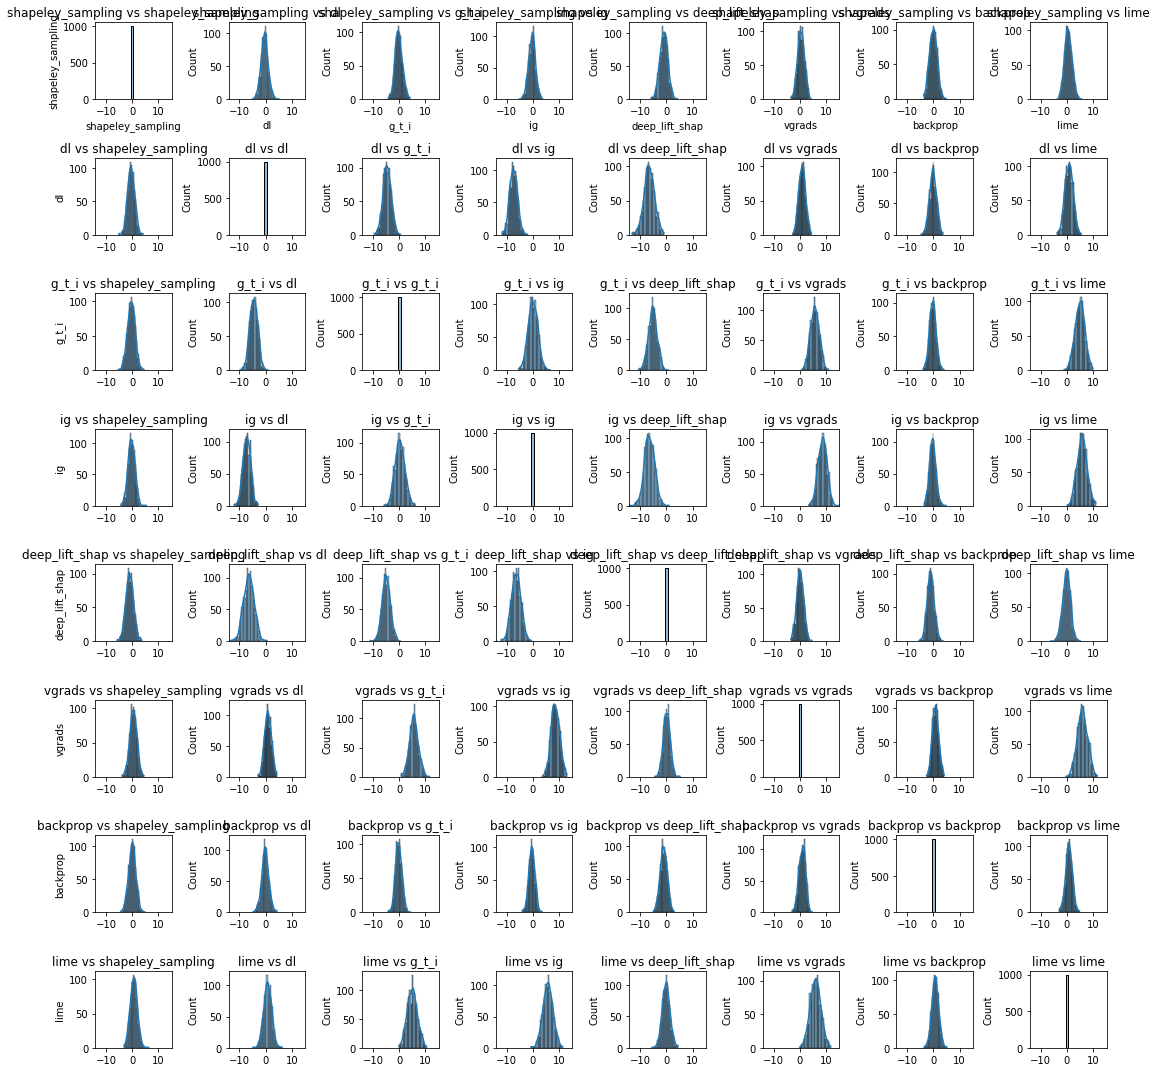

In [26]:
plot_gaussian_distributions(
    distances=difference_kpca_linear_NoAttacked_RandLabels, 
    techniques=list(techniques), 
    metric=METRIC
)

## kPCA (poly)

### No Attack

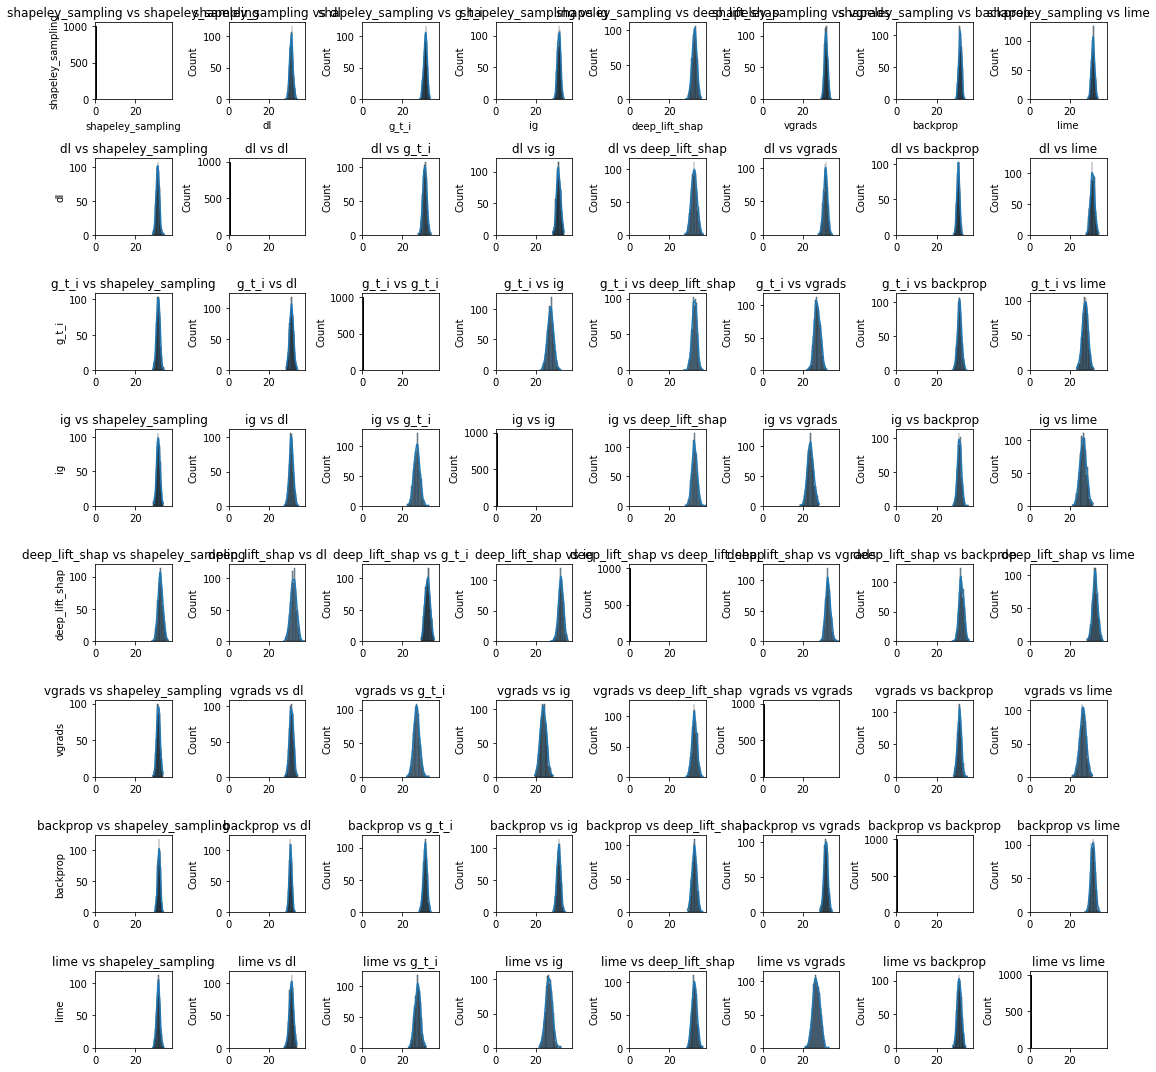

In [27]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_kcpa_poly_1), 
    techniques=list(techniques), 
    metric=METRIC
)

### RandLabels Attack

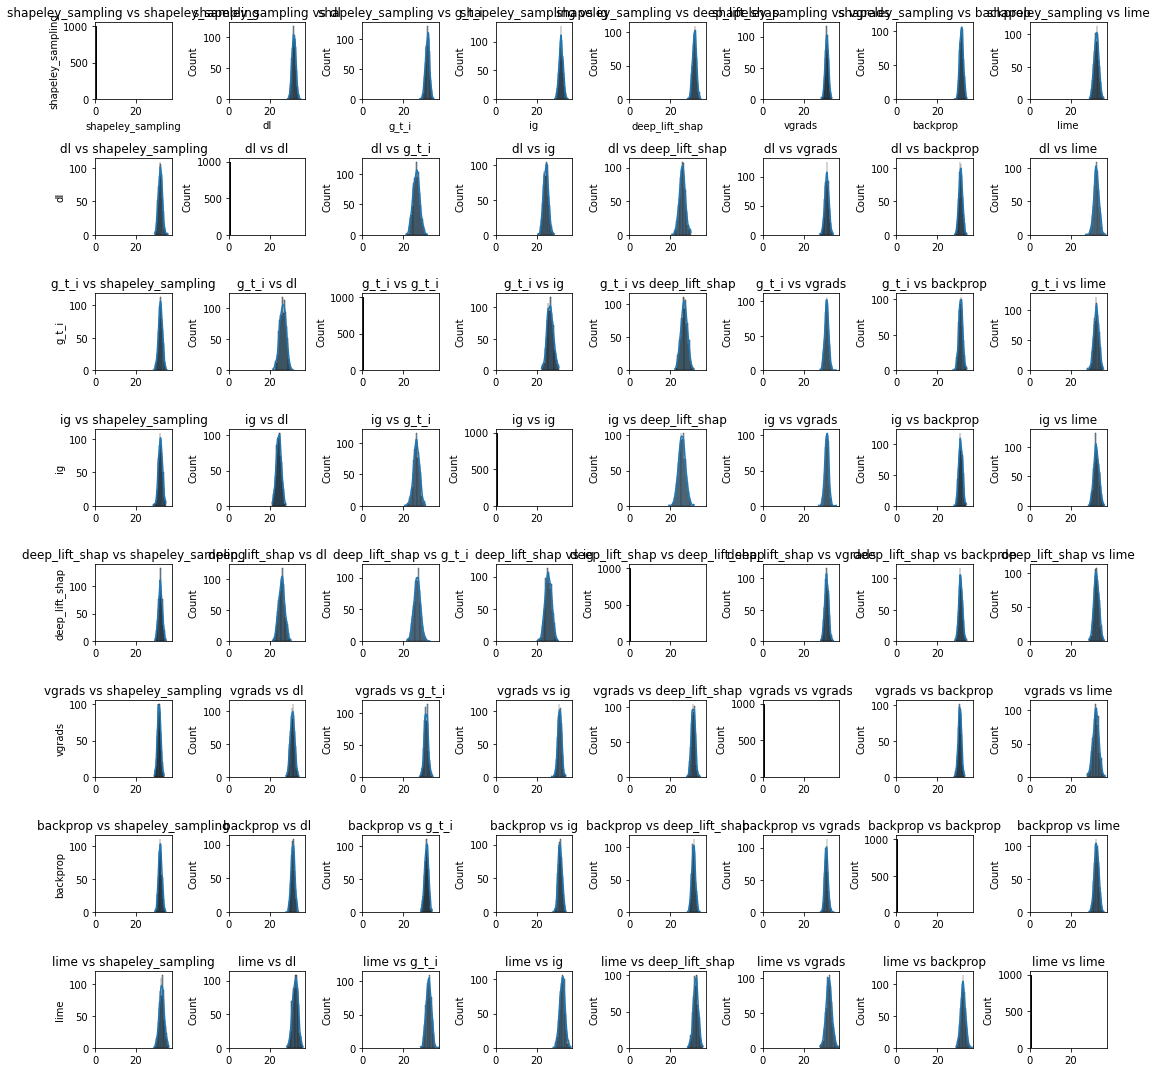

In [28]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_kcpa_poly_2), 
    techniques=list(techniques), 
    metric=METRIC
)

### No Attack vs. RandLabels (Difference)

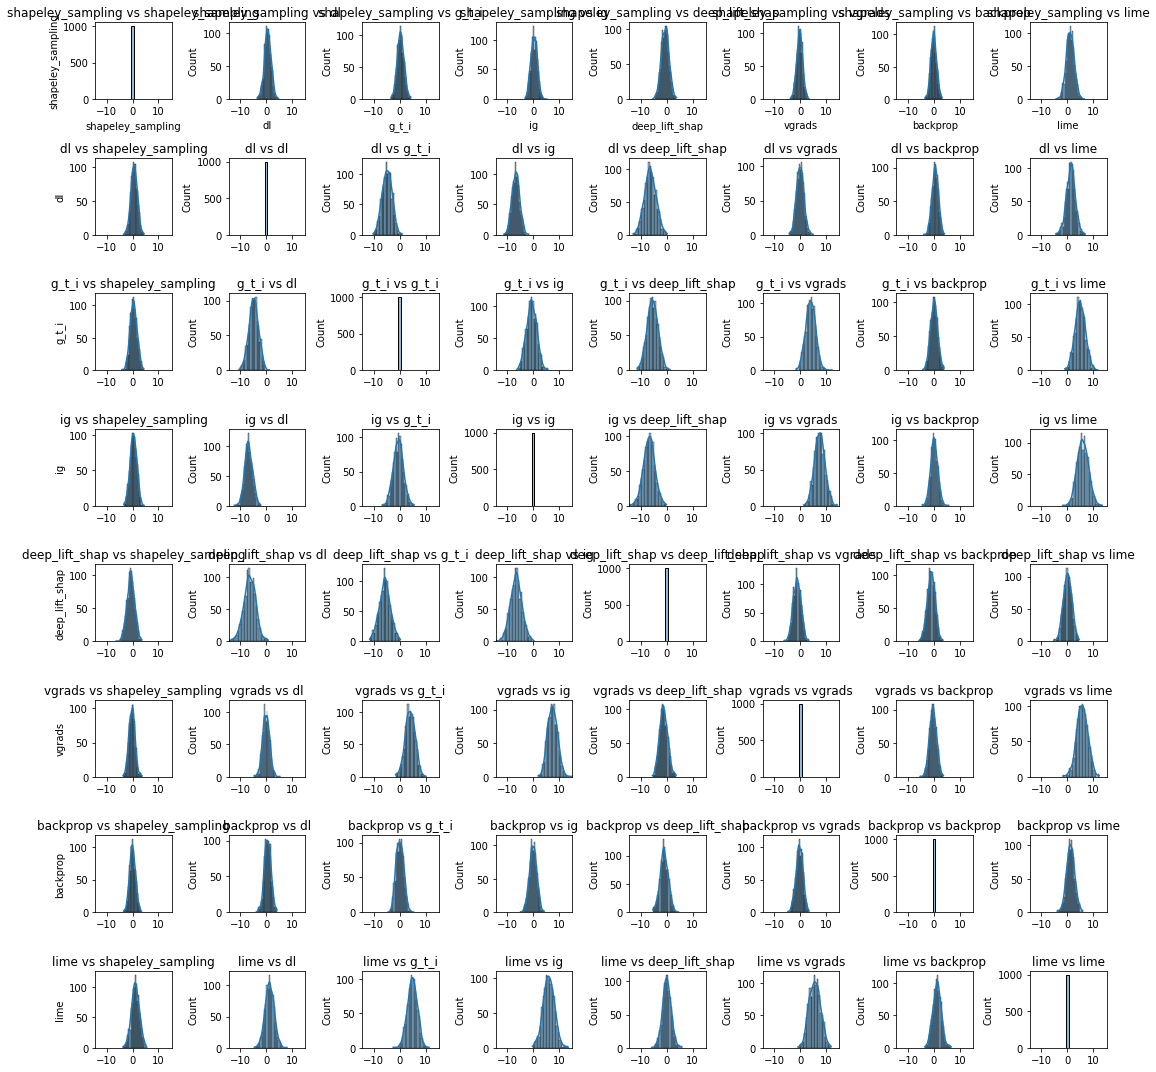

In [29]:
plot_gaussian_distributions(
    distances=difference_kpca_poly_NoAttacked_RandLabels, 
    techniques=list(techniques), 
    metric=METRIC
)

## kPCA (cosine)

### No Attack

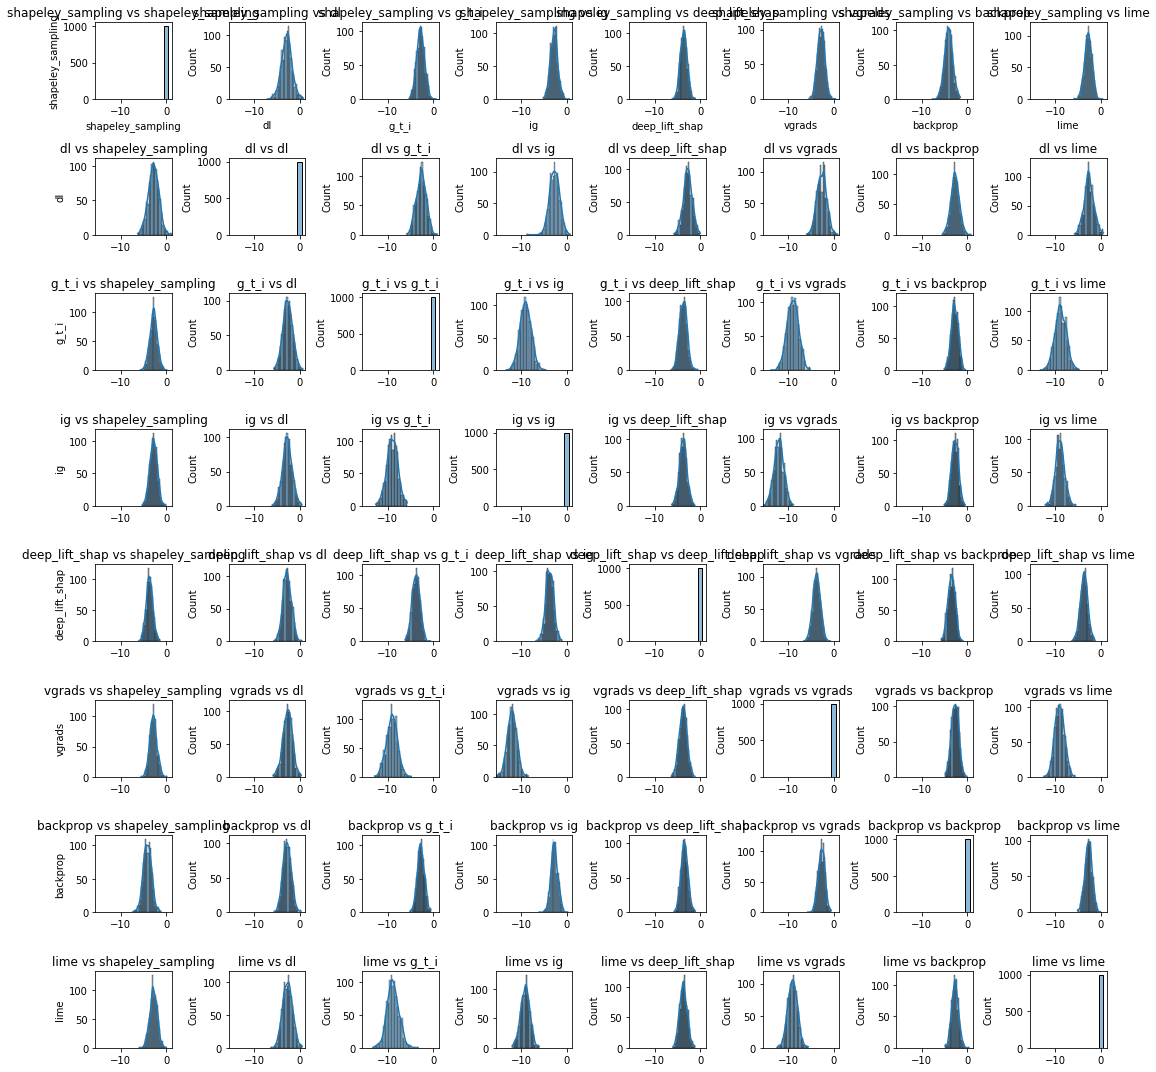

In [30]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_kcpa_cosine_1), 
    techniques=list(techniques), 
    metric=METRIC
)

### RandLabels Attack

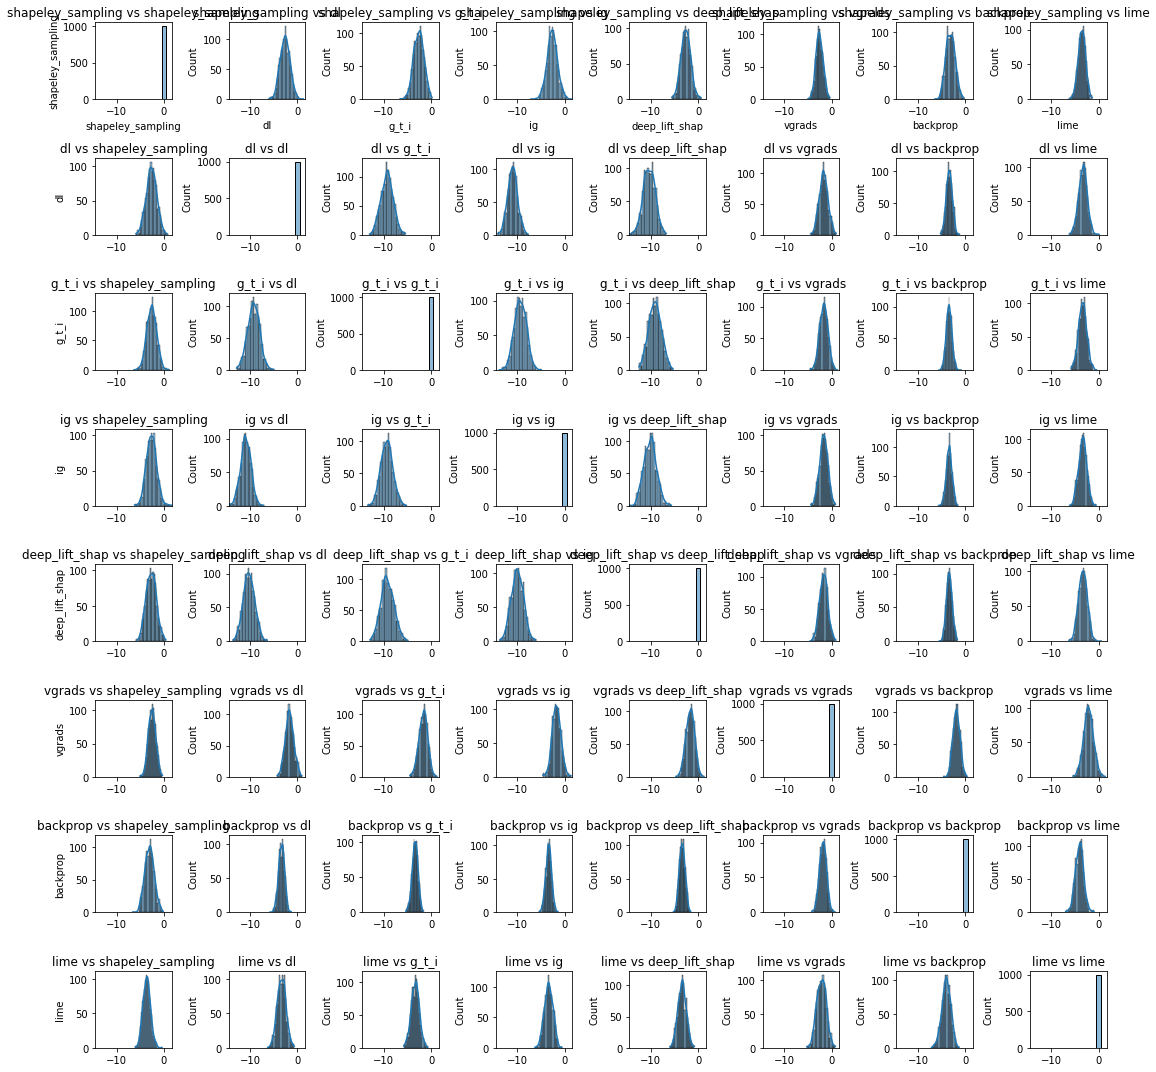

In [31]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_kcpa_cosine_2), 
    techniques=list(techniques), 
    metric=METRIC
)

### No Attack vs. RandLabels (Difference)

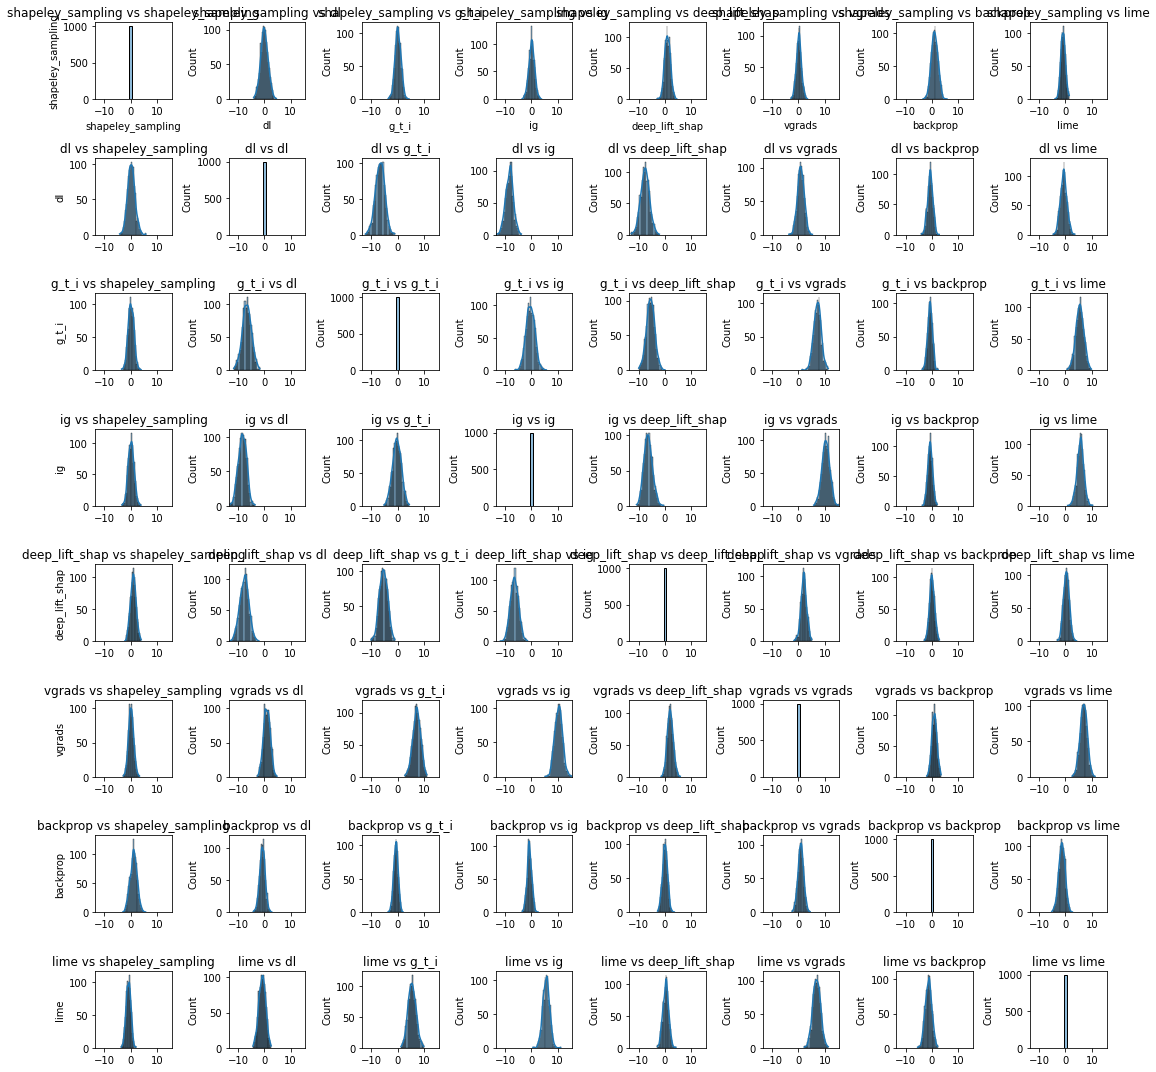

In [32]:
plot_gaussian_distributions(
    distances=difference_kpca_cosine_NoAttacked_RandLabels, 
    techniques=list(techniques), 
    metric=METRIC
)

## tSNE

### No Attack

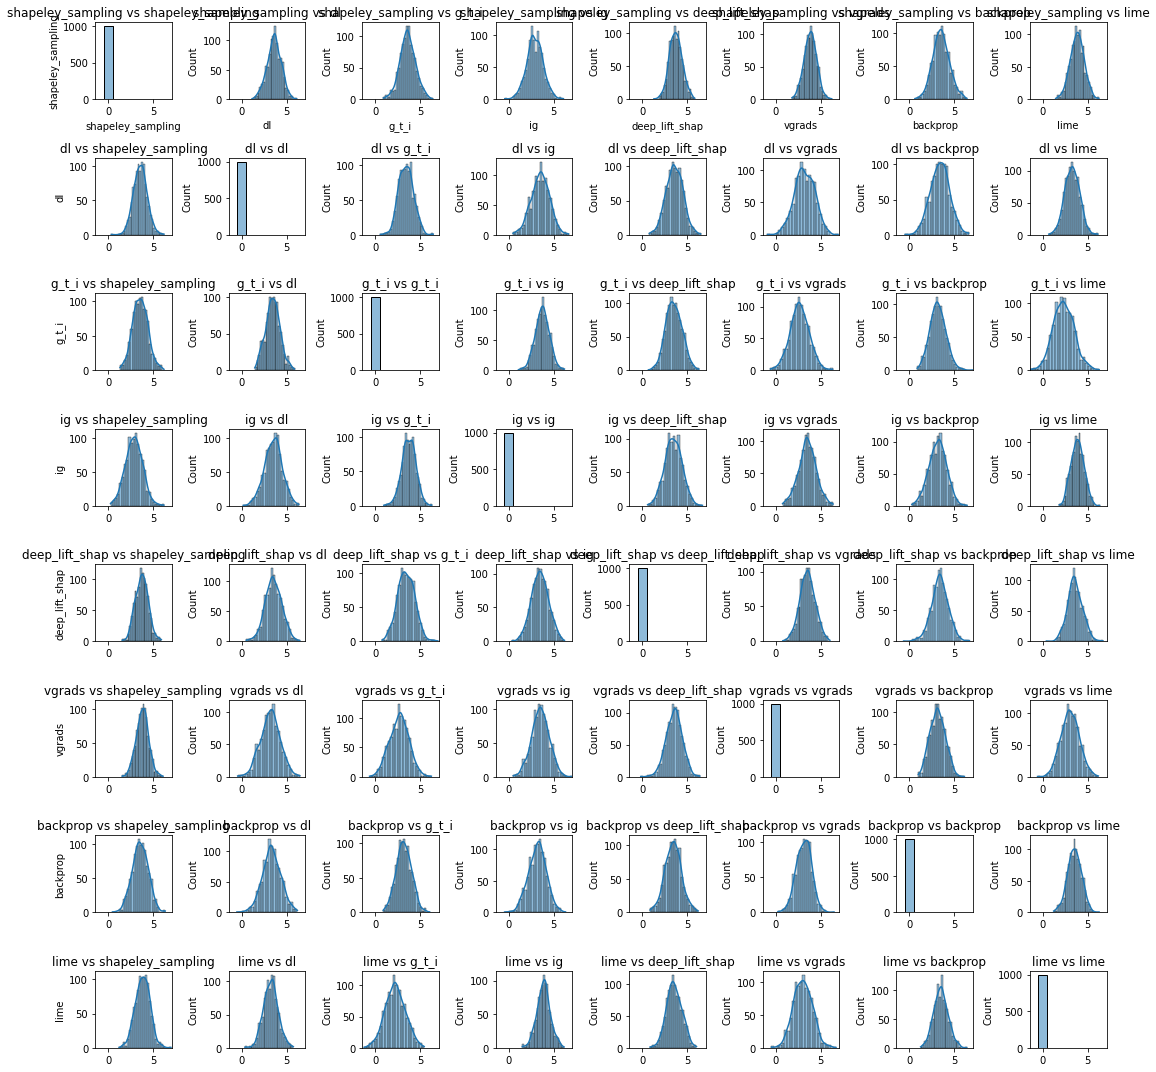

In [33]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_tsne_1), 
    techniques=list(techniques), 
    metric=METRIC
)

### RandLabels Attack

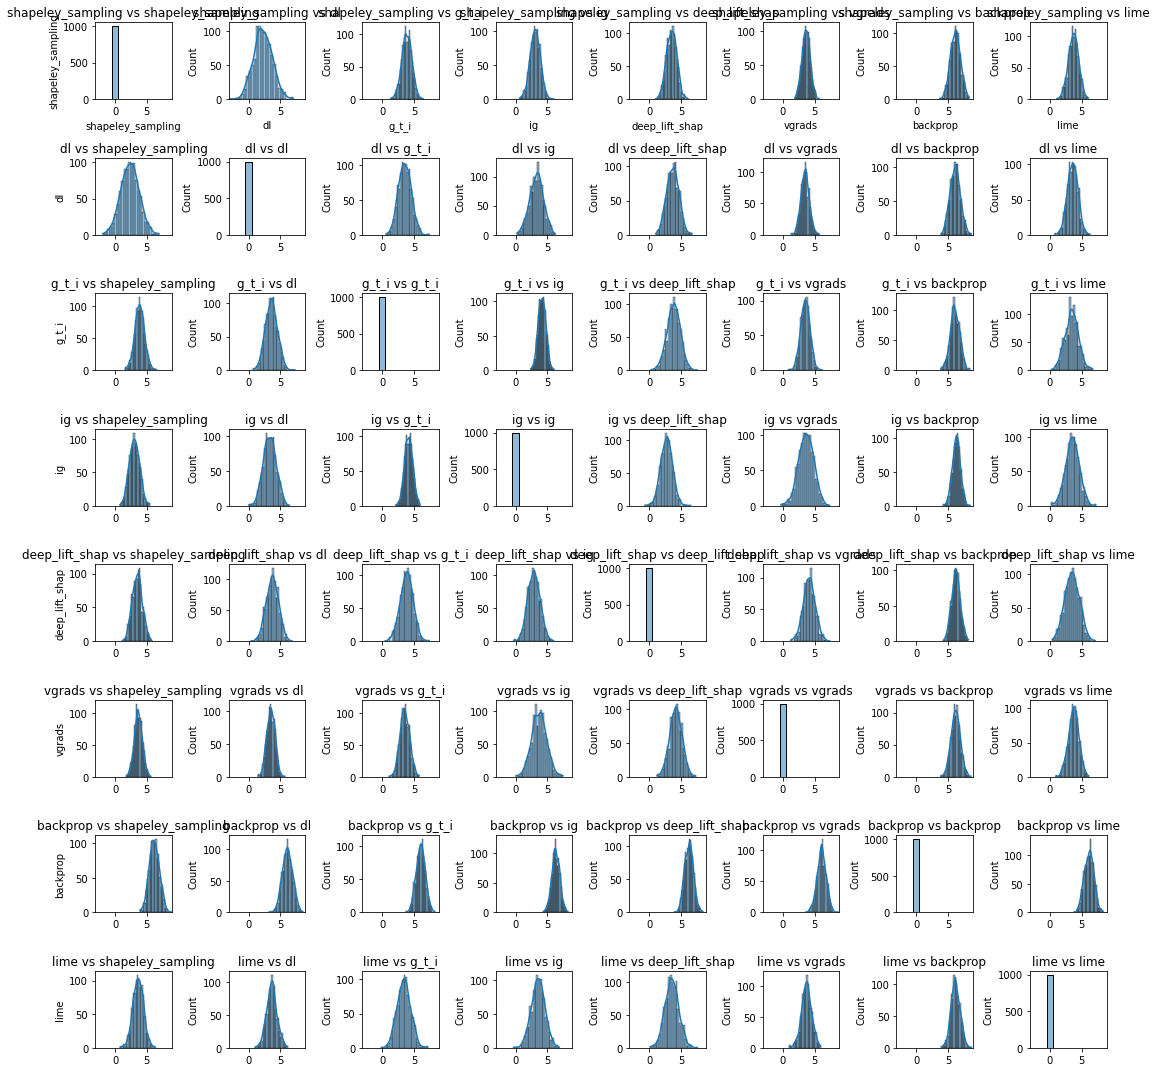

In [34]:
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances_tsne_2), 
    techniques=list(techniques), 
    metric=METRIC
)

### No Attack vs. RandLabels (Difference)

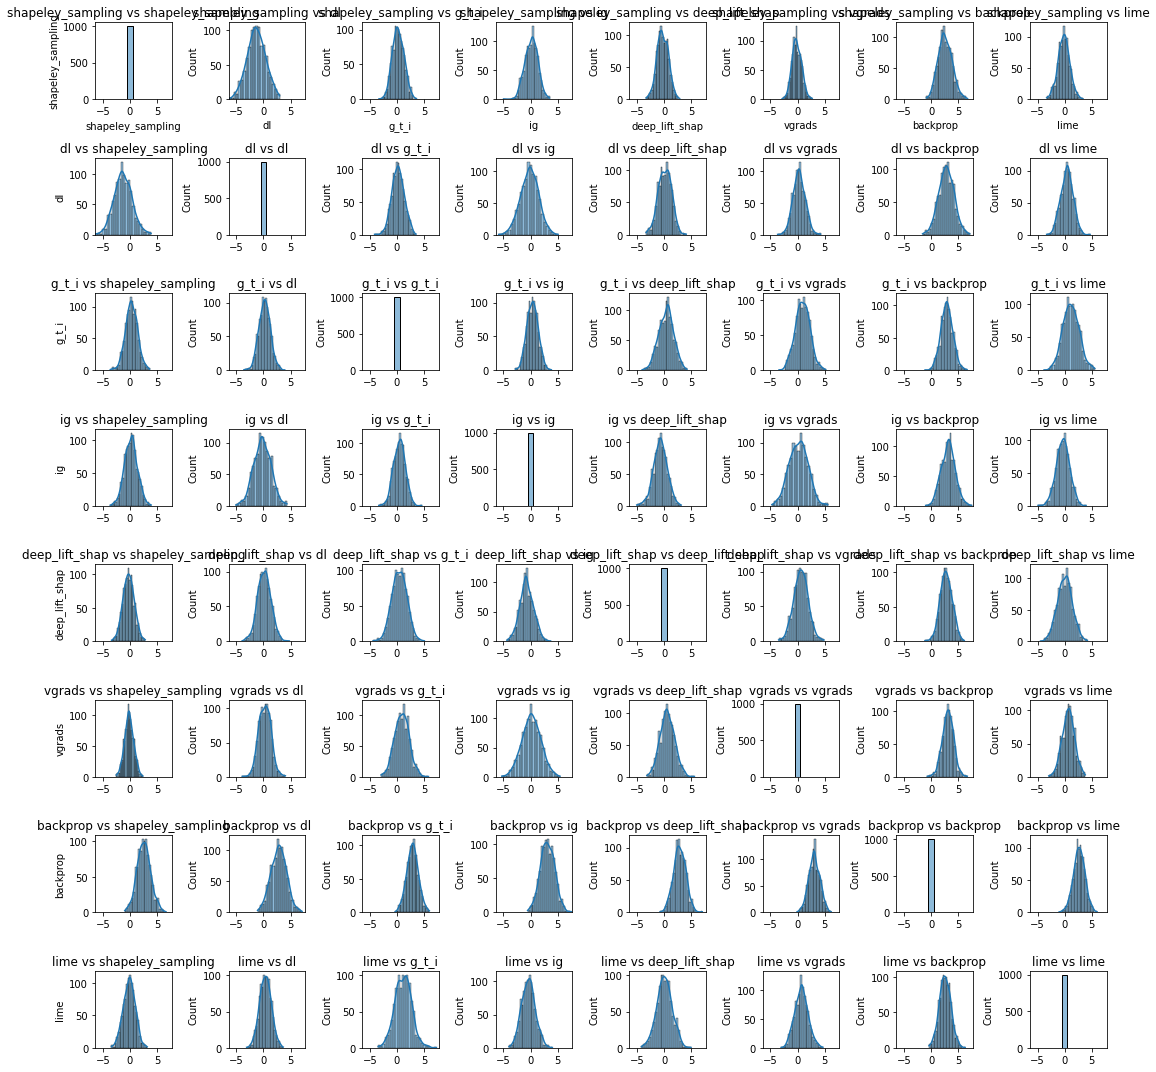

In [35]:
plot_gaussian_distributions(
    distances=difference_tsne_NoAttacked_RandLabels, 
    techniques=list(techniques), 
    metric=METRIC
)